# Data analysis of collision data `Cyclists.shp`, Toronto neighbourhoods map `toronto_neighbourhoods.shp`, and Toronto neighbourhoods profiles `neighbourhood-profiles-2021-158-model.xlsx` .


## Import libraries

In [6]:
# Import 3rd party libraries
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import datetime as dt
import shapely 

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

## Load datasets 

### Load `toronto_neighbourhoods.shp` file

In [73]:
neighbourhoods = gpd.read_file('toronto_neighbourhoods.shp')
neighbourhoods.head()

,FIELD_1,FIELD_2,FIELD_3,FIELD_4,FIELD_5,FIELD_6,FIELD_7,FIELD_8,FIELD_9,FIELD_10,FIELD_11,FIELD_12,FIELD_13,FIELD_14,FIELD_15,geometry
0,2101,25886861,25926662,49885,94,94,Wychwood (94),Wychwood (94),None,None,-79.425515,43.676919,16491505,3.217960e+06,7515.779658,"POLYGON ((-79.43592 43.68015, -79.43492 43.680..."
1,2102,25886820,25926663,49885,100,100,Yonge-Eglinton (100),Yonge-Eglinton (100),None,None,-79.403590,43.704689,16491521,3.160334e+06,7872.021074,"POLYGON ((-79.41096 43.70408, -79.40962 43.704..."
2,2103,25886834,25926664,49885,97,97,Yonge-St.Clair (97),Yonge-St.Clair (97),None,None,-79.397871,43.687859,16491537,2.222464e+06,8130.411276,"POLYGON ((-79.39119 43.68108, -79.39141 43.680..."
3,2104,25886593,25926665,49885,27,27,York University Heights (27),York University Heights (27),None,None,-79.488883,43.765736,16491553,2.541821e+07,25632.335242,"POLYGON ((-79.50529 43.75987, -79.50488 43.759..."
4,2105,25886688,25926666,49885,31,31,Yorkdale-Glen Park (31),Yorkdale-Glen Park (31),None,None,-79.457108,43.714672,16491569,1.156669e+07,13953.408098,"POLYGON ((-79.43969 43.70561, -79.44011 43.705..."


Select columns needed ('FIELD_8' and 'geometry'), rename `FIELD_8` to `name`, and remove the parentheses and numbers and the end of each neighbourhood name:

In [74]:
neighbourhoods = neighbourhoods[['geometry', 'FIELD_8']].rename(columns = {'FIELD_8':'name'})
neighbourhoods['name'] = neighbourhoods['name'].str.replace(r'\s*\(\d+\)', '', regex=True)
# View GeoDataFrame
neighbourhoods.head()

,geometry,name
0,"POLYGON ((-79.43592 43.68015, -79.43492 43.680...",Wychwood
1,"POLYGON ((-79.41096 43.70408, -79.40962 43.704...",Yonge-Eglinton
2,"POLYGON ((-79.39119 43.68108, -79.39141 43.680...",Yonge-St.Clair
3,"POLYGON ((-79.50529 43.75987, -79.50488 43.759...",York University Heights
4,"POLYGON ((-79.43969 43.70561, -79.44011 43.705...",Yorkdale-Glen Park


Check the crs of `neighbourhoods` GeoDataFrames and convert `epsg` to `epsg=26917`.

In [75]:
neighbourhoods.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [76]:
neighbourhoods = neighbourhoods.to_crs(epsg=26917)

### Load the cyclist collision data and remove all the collision accidents prior to 2018.

In [7]:
collision_shp = gpd.read_file("Cyclists.shp")

In [8]:
collision_gdf = gpd.GeoDataFrame(data = collision_shp, geometry = collision_shp.geometry)
collision_gdf = collision_gdf.loc[collision_gdf['YEAR'] >=2018]
collision_gdf.head(20)

,INDEX_,ACCNUM,YEAR,DATE,TIME,STREET1,STREET2,OFFSET,ROAD_CLASS,DISTRICT,...,REDLIGHT,ALCOHOL,DISABILITY,HOOD_158,NEIGHBOURH,HOOD_140,NEIGHBOU_1,DIVISION,ObjectId,geometry
1001,80923405,None,2018,2018-01-22,1130,THURMAN RD,STEELES AVE W,None,Major Arterial,North York,...,None,None,None,35,Westminster-Branson,35,Westminster-Branson (35),D32,1002,POINT (-8844666.500 5433115.618)
1002,80923406,None,2018,2018-01-22,1130,THURMAN RD,STEELES AVE W,None,Major Arterial,North York,...,None,None,None,35,Westminster-Branson,35,Westminster-Branson (35),D32,1003,POINT (-8844666.500 5433115.618)
1003,80937623,None,2018,2018-01-22,1525,HANNA RD,SUTHERLAND DR,None,Local,North York,...,None,None,None,56,Leaside-Bennington,56,Leaside-Bennington (56),D53,1004,POINT (-8834934.394 5419362.224)
1004,80937624,None,2018,2018-01-22,1525,HANNA RD,SUTHERLAND DR,None,Local,North York,...,None,None,None,56,Leaside-Bennington,56,Leaside-Bennington (56),D53,1005,POINT (-8834934.394 5419362.224)
1005,80926724,None,2018,2018-02-03,1525,8 HERTFORD AVE,None,30 m North of,Local,Etobicoke York,...,None,None,None,110,Keelesdale-Eglinton West,110,Keelesdale-Eglinton West (110),D12,1006,POINT (-8847375.794 5417393.496)
1006,81514422,None,2018,2018-02-03,1525,8 HERTFORD AVE,None,30 m North of,Local,Etobicoke York,...,None,None,None,110,Keelesdale-Eglinton West,110,Keelesdale-Eglinton West (110),D12,1007,POINT (-8847375.794 5417393.496)
1007,80913986,None,2018,2018-04-13,1918,THE WESTWAY,KIPLING AVE,11 m South of,Major Arterial,Etobicoke York,...,None,None,None,7,Willowridge-Martingrove-Richview,7,Willowridge-Martingrove-Richview (7),D23,1008,POINT (-8855984.241 5416909.038)
1008,80913987,None,2018,2018-04-13,1918,THE WESTWAY,KIPLING AVE,11 m South of,Major Arterial,Etobicoke York,...,None,None,None,7,Willowridge-Martingrove-Richview,7,Willowridge-Martingrove-Richview (7),D23,1009,POINT (-8855984.241 5416909.038)
1009,80941372,None,2018,2018-05-15,1558,LAKE SHORE BV W,COLBORNE LODGE DR,None,Major Arterial,Toronto and East York,...,Yes,None,None,85,South Parkdale,85,South Parkdale (85),D11,1010,POINT (-8845322.172 5409546.926)
1010,80941373,None,2018,2018-05-15,1558,LAKE SHORE BV W,COLBORNE LODGE DR,None,Major Arterial,Toronto and East York,...,Yes,None,None,85,South Parkdale,85,South Parkdale (85),D11,1011,POINT (-8845322.172 5409546.926)


### Load neighbourhood profile data

This is a `.xlsx` file, use `read_excel`. The entries in the first column should be column names. So this dataframe should be transposed before using it for analysis (`.transpose()`). 

In [79]:
neighbourhoods_profile = pd.read_excel('neighbourhood-profiles-2021-158-model.xlsx')

#transpose
neighbourhoods_profile = neighbourhoods_profile.transpose()

# select the first column as column names
neighbourhoods_profile.columns = neighbourhoods_profile.iloc[0]

# Exclude the first row which is now the column names
neighbourhoods_profile = neighbourhoods_profile[1:] 

neighbourhoods_profile.head()

Neighbourhood Name,Neighbourhood Number,TSNS 2020 Designation,Total - Age groups of the population - 25% sample data,0 to 14 years,0 to 4 years,5 to 9 years,10 to 14 years,15 to 64 years,15 to 19 years,20 to 24 years,...,Between 9 a.m. and 11:59 a.m.,Between 12 p.m. and 4:59 a.m.,Total - Eligibility for instruction in the minority official language for the population in private households born in 2003 or later - 25% sample data,Children eligible for instruction in the minority official language,Children not eligible for instruction in the minority official language,"Total - Eligibility and instruction in the minority official language, for the population in private households born between 2003 and 2015 (inclusive) - 25% sample data",Children eligible for instruction in the minority official language,Eligible children who have been instructed in the minority official language at the primary or secondary level in Canada,Eligible children who have not been instructed in the minority official language at the primary or secondary level in Canada,Children not eligible for instruction in the minority official language
West Humber-Clairville,1,Not an NIA or Emerging Neighbourhood,33300,4295,1460,1345,1485,23640,1860,3175,...,1665,2935,5430,410,5020,3875,335,255,75,3540
Mount Olive-Silverstone-Jamestown,2,Neighbourhood Improvement Area,31345,5690,1650,1860,2175,21490,2280,2675,...,1145,2965,7285,510,6780,5540,395,245,145,5145
Thistletown-Beaumond Heights,3,Neighbourhood Improvement Area,9850,1495,505,540,455,6615,570,745,...,395,635,1860,180,1685,1325,120,75,45,1205
Rexdale-Kipling,4,Not an NIA or Emerging Neighbourhood,10375,1575,505,615,455,6950,515,715,...,425,775,1910,135,1770,1370,90,75,25,1275
Elms-Old Rexdale,5,Neighbourhood Improvement Area,9355,1610,440,480,685,6355,635,685,...,355,675,2015,95,1920,1520,70,60,10,1445


## Exploratory Data Analysis 

### Traffic controls and locations (where collisions happened)

There are two columns `TRAFFCTL` and `ACCLOC` in `collision_gdf`. 
`TRAFFCTL` is the various traffic control types presents at the collision scenes.
A pie chart is plotted here to show the percentage of traffic control presence in cyclist-involved collisions.

In [80]:
traffic_control = collision_gdf.groupby('TRAFFCTL').agg({'INDEX_': 'count'}).reset_index()

traffic_control

,TRAFFCTL,INDEX_
0,No Control,201
1,Stop Sign,38
2,Traffic Controller,4
3,Traffic Signal,157


Plot pie chart: 

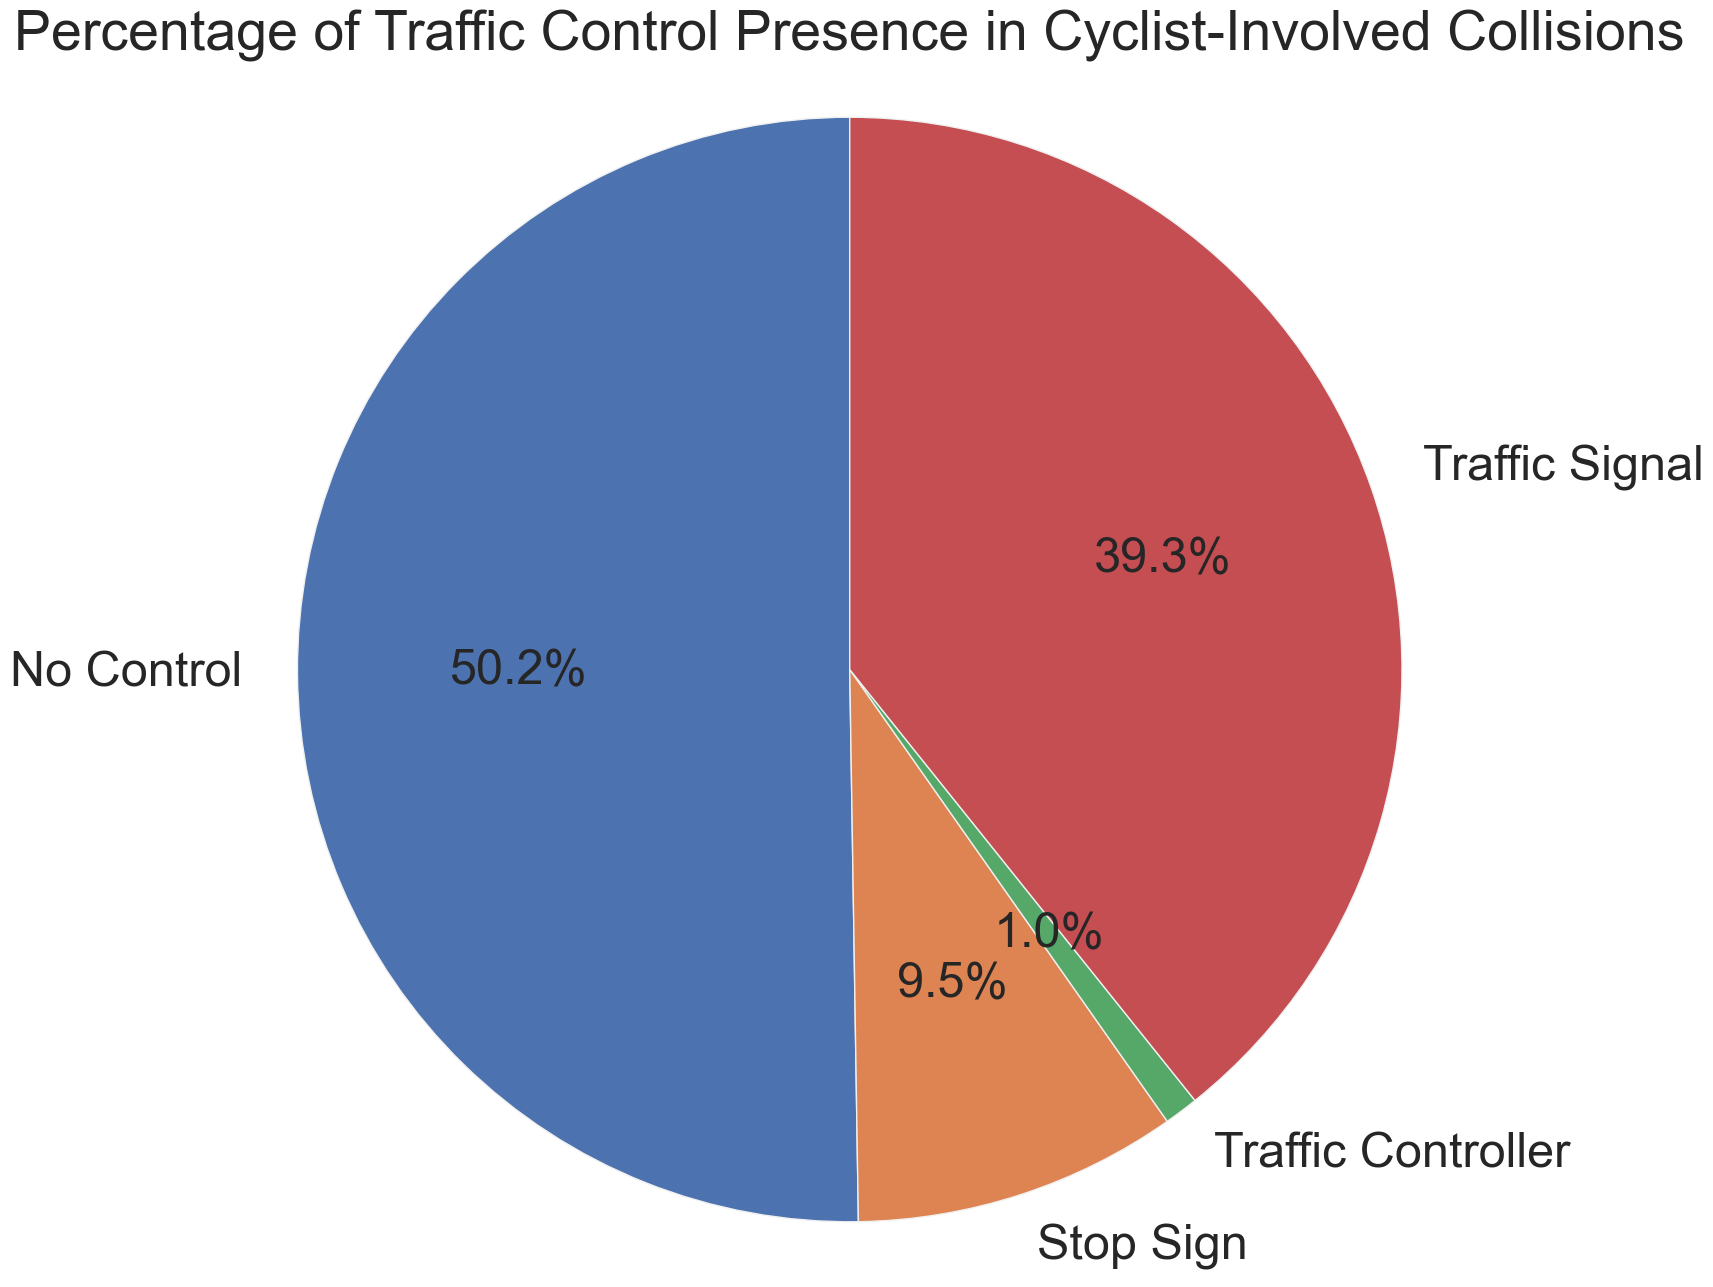

In [231]:
plt.figure(figsize=(15, 15), facecolor='white')

# set colors
custom_colors = sns.color_palette('deep')[0:4]

#plot
plt.pie(traffic_control['INDEX_'], labels=traffic_control['TRAFFCTL'], autopct='%1.1f%%', startangle=90, colors=custom_colors, textprops={'fontsize': 35})

#format pie chart
plt.title('Percentage of Traffic Control Presence in Cyclist-Involved Collisions', fontsize = 40)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

#save chart
plt.savefig('traffic_ctl_percentage.png',bbox_inches='tight',facecolor='white', edgecolor='none')


`ACCLOC` is the locations where collision happened.
A pie chart is plotted here to show percentage of collision occurrences based on location types.

In [82]:

col_loc = collision_gdf.groupby('ACCLOC').agg({'INDEX_': 'count'}).reset_index()

col_loc

,ACCLOC,INDEX_
0,At Intersection,236
1,At/Near Private Drive,50
2,Intersection Related,41
3,Non Intersection,71
4,Overpass or Bridge,2


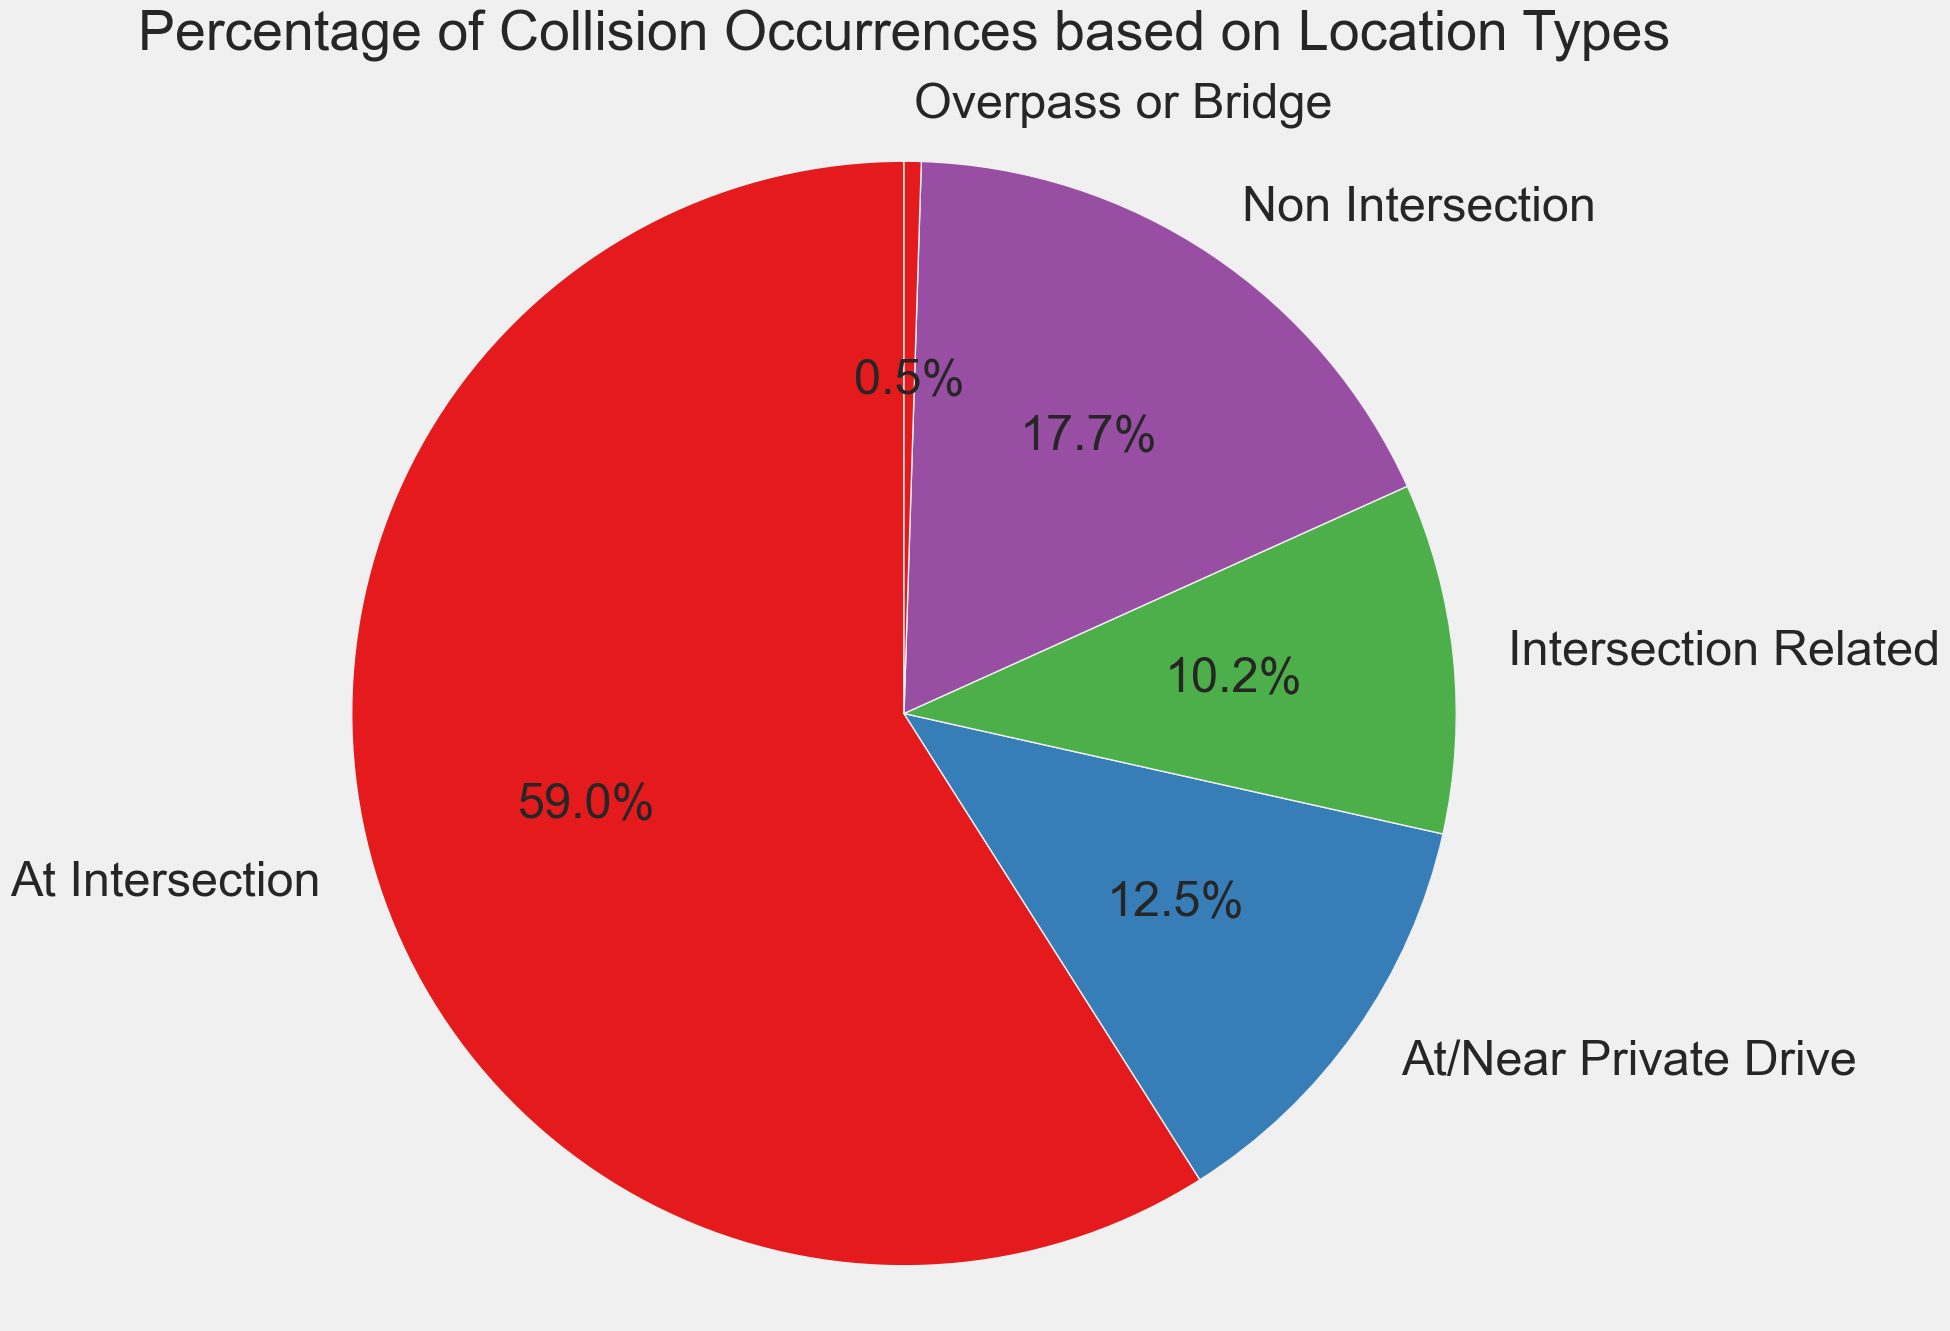

In [232]:
plt.figure(figsize=(15,15))

#set colors
custom_colors = sns.color_palette('Set1')[0:4]

#plot
plt.pie(col_loc['INDEX_'], labels=col_loc['ACCLOC'], autopct='%1.1f%%', startangle=90, colors=custom_colors, textprops={'fontsize': 35})

#format
plt.title('Percentage of Collision Occurrences based on Location Types', fontsize = 40,pad=40)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

#save figure
plt.savefig('collision_loc.png',bbox_inches='tight',facecolor='white', edgecolor='none')

### Temporal Analysis

Monthly distributions:

In [233]:
#the DATE column in collision_gdf is not in datetime format. in order to do temporal analysis, this column needs to be converted to datetime formate: 
collision_gdf['DATE'] = pd.to_datetime(collision_gdf['DATE'] )

#monthly distribution of collisions in all five years
#assign the data to a new dataframe
collision_month = collision_gdf

#assign the month in the DATE column to a new column called month
collision_month['month'] = collision_month['DATE'].dt.month 

#group by month and count the number of collisons in each month
collision_month = collision_month.groupby(['month']).agg({'INDEX_':'count'}).reset_index()


#for the plotting, it would be nice to have the months' abbreviations, instead of numbers: 
month_mapping = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

# Replace numbers with month names using map()
collision_month['month'] = collision_month['month'].map(month_mapping)

collision_month

,month,INDEX_
0,Jan,6
1,Feb,4
2,Mar,13
3,Apr,22
4,May,42
5,Jun,59
6,Jul,40
7,Aug,50
8,Sep,64
9,Oct,33


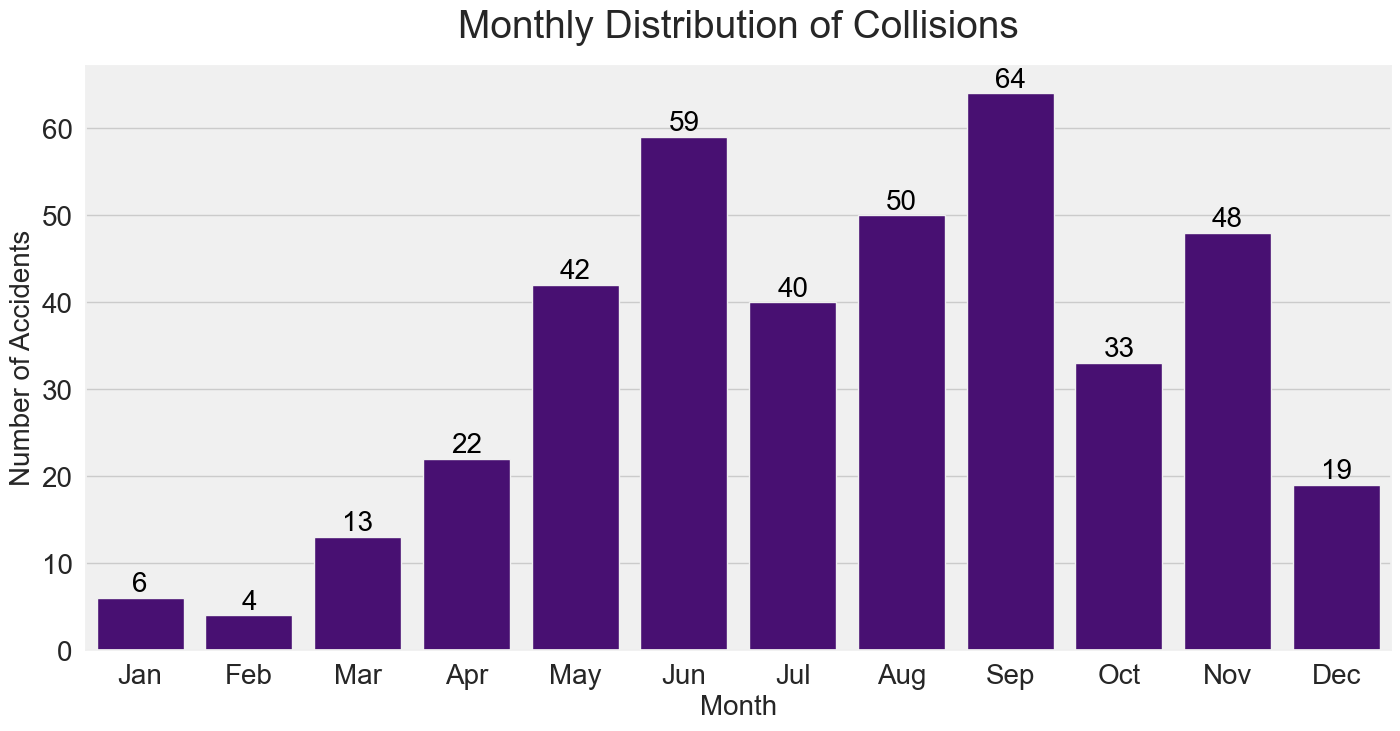

In [234]:
#plot the monthly distribution
plt.figure(figsize=(15, 15), facecolor='white')
bar_plot = sns.barplot(data=collision_month, x='month', y='INDEX_', color='indigo')

# Title and labels
plt.title('Monthly Distribution of Collisions', fontsize=28, pad = 20)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Number of Accidents', fontsize=20)

threshold = 1  # Set a threshold for the height of bars to display labels
sns.set_style("whitegrid")

for p in bar_plot.patches:
    height = p.get_height()
    if height > threshold:
        plt.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom', fontsize=20, color='black')
plt.gca().set_aspect(0.08)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.savefig('collision_by_month_basic.png', bbox_inches='tight', facecolor='white', edgecolor='none',transparent = True)



Annual distributions (similar analysis as monthly distributions)

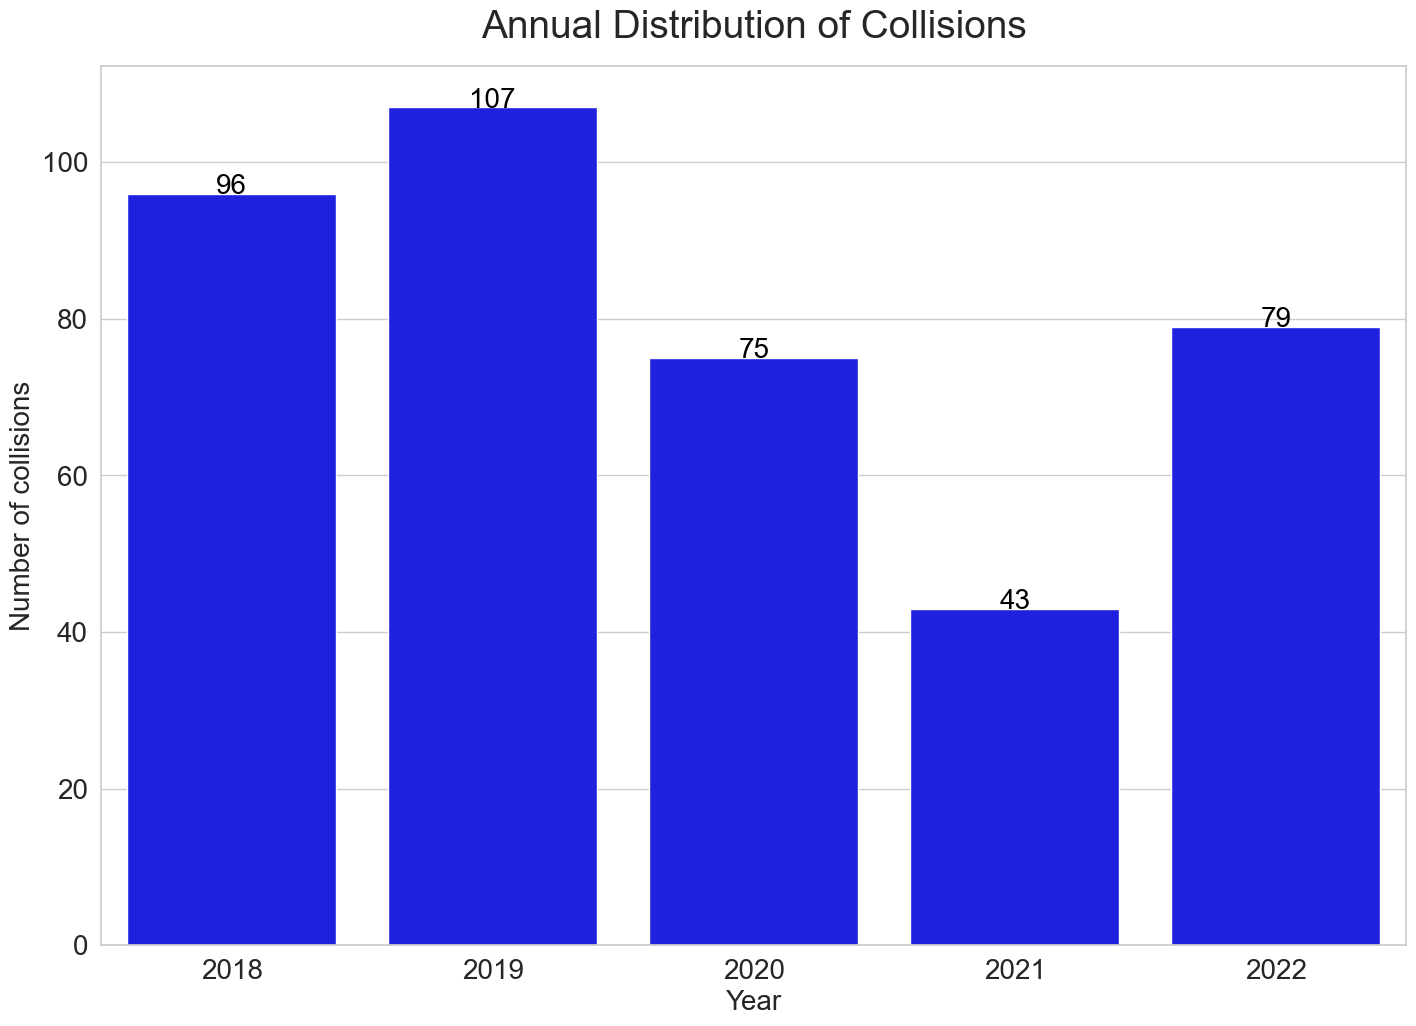

In [235]:
#count the number of collisions in a year
collision_year = collision_gdf
collision_year['DATE'] = pd.to_datetime(collision_year['DATE'])
collision_year['year'] = collision_year['DATE'].dt.year
collision_year1 = collision_year.groupby(['year']).agg({'INDEX_':'count'}).reset_index()

#plot the annual distribution
fig, ax = plt.subplots(figsize=(15, 15))
sns.barplot(data=collision_year1, x='year', y='INDEX_', color='blue', ax=ax)

#formatting
plt.title('Annual Distribution of Collisions', fontsize=28, pad=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Number of collisions', fontsize=20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

#add date labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=20, color='black', xytext=(0, 5),
                textcoords='offset points')

ax.set_aspect(0.03)  # Adjust the aspect ratio as needed

plt.savefig('collision_by_year.png', bbox_inches='tight', facecolor='white', edgecolor='none',transparent = True)


Distribution by involvement type (parties involved in the collision other than the cyclist):

In [236]:
collision_year = collision_gdf

#count the number of collisions by involvement type `INVTYPE`.
collision_year['year'] = collision_gdf['DATE'].dt.year
collision_year = collision_year.groupby(['year','INVTYPE']).agg({'INDEX_':'count'}).reset_index()

#add a new column and convert the count number to percentages:
collision_year['percentage'] = collision_year.groupby('year')['INDEX_'].transform(lambda x: x / x.sum() * 100)

collision_year

,year,INVTYPE,INDEX_,percentage
0,2018,Cyclist,45,46.875000
1,2018,Cyclist Passenger,1,1.041667
2,2018,Driver,39,40.625000
3,2018,Motorcycle Driver,1,1.041667
4,2018,Other,2,2.083333
5,2018,Passenger,5,5.208333
6,2018,Truck Driver,3,3.125000
7,2019,Cyclist,46,42.990654
8,2019,Cyclist Passenger,1,0.934579
9,2019,Driver,46,42.990654


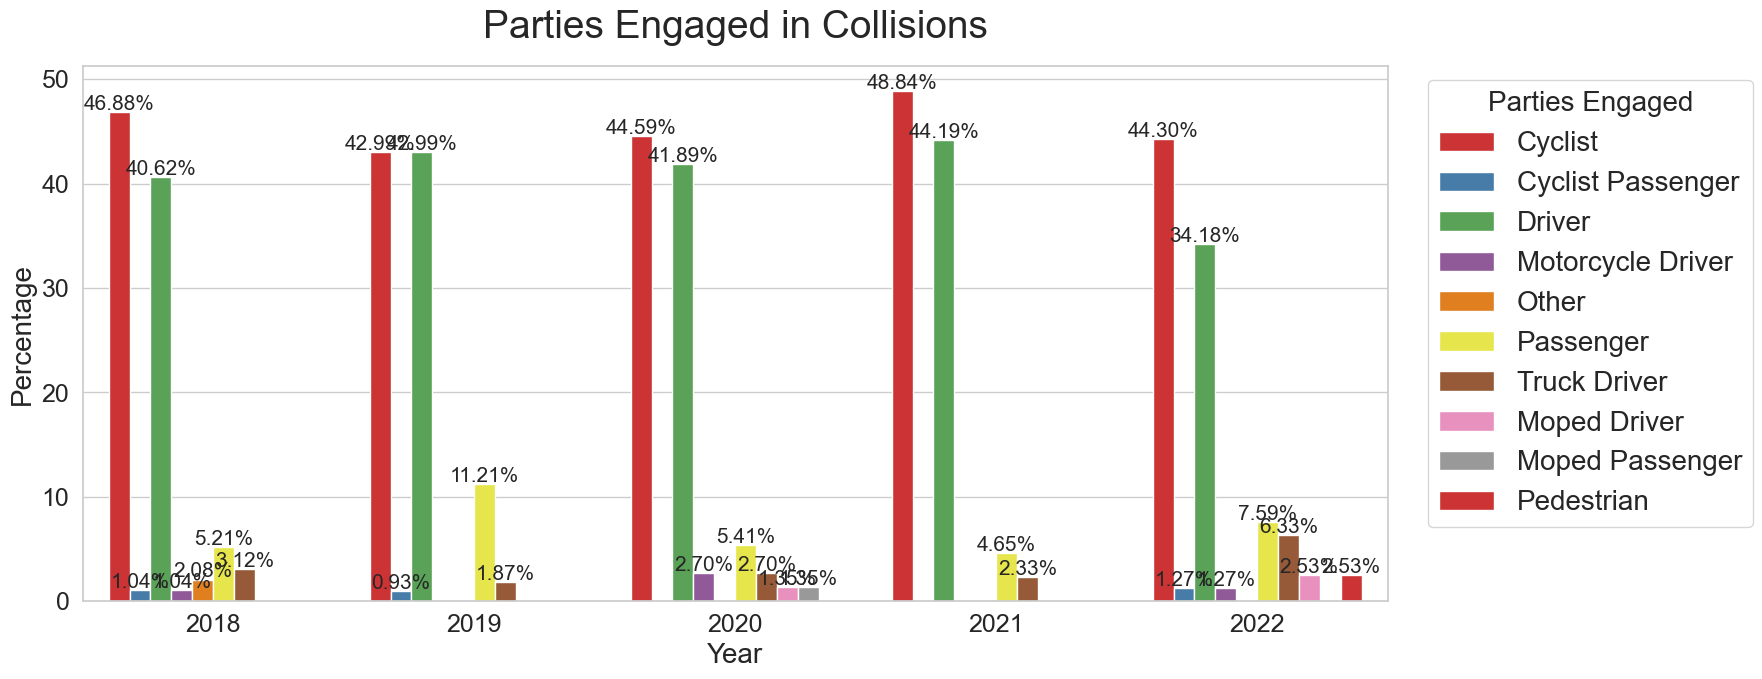

In [237]:
#plot the distribution
plt.figure(figsize=(15, 15))
ax = sns.barplot(data=collision_year, x='year', y='percentage', hue='INVTYPE', palette='Set1', ci=None)

spacing = 0.2  # Adjust this spacing factor as needed

#add labels
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height + spacing),
                ha='center', fontsize=15)

# Title and labels
plt.title('Parties Engaged in Collisions', fontsize=28, pad = 20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Percentage', fontsize=20)

plt.gca().set_aspect(0.04) 
plt.legend(title='Parties Engaged', bbox_to_anchor=(1.02, 1), loc='upper left', title_fontsize = 20, fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.savefig('percent_invol_type_year.png', bbox_inches='tight', facecolor='white', edgecolor='none', transparent=True)

Weekdays vs weekends

There is a column in `collision_gdf` called `LIGHT`, which are the light condition at the collision scene. Plot the distribution by light conditions and separate weekdays and weekends under each light condition: 

<Figure size 1500x1500 with 0 Axes>

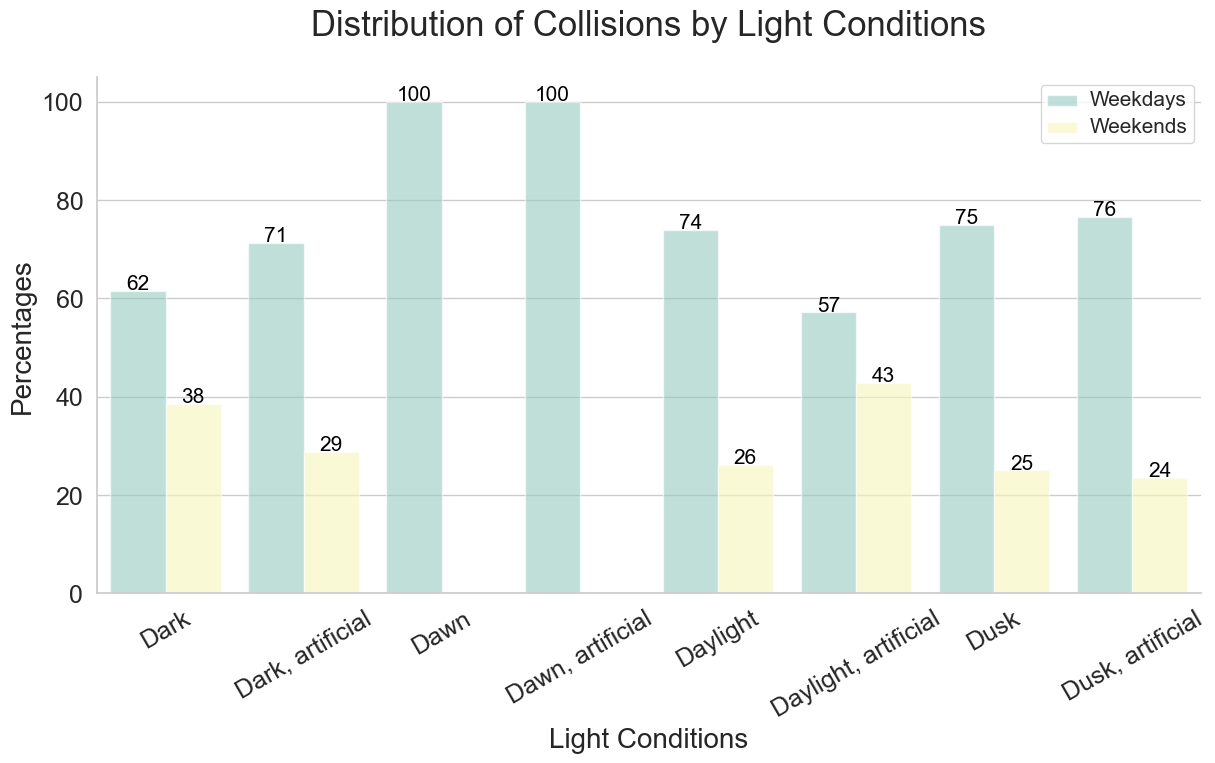

In [238]:
collision_gdf['DATE'] = pd.to_datetime(collision_gdf['DATE'], format='%Y-%m-%d')


# assign true for weekends false for weekdays (.dayofweek assign number to each day of the week; 0-4 are weekdays, 5 and 6 are weekends)
collision_gdf['if_weekends'] = collision_gdf['DATE'].apply(lambda x: x.dayofweek >= 5)


#count the number of collisions under each light condition
weekdays_light_cond = collision_gdf.groupby(['LIGHT', 'if_weekends']).agg({'INDEX_':'count'})

weekdays_light_cond = weekdays_light_cond.reset_index()

#calculate the percentage of weekdays and weekends under each light condition
weekdays_light_cond['percentage'] = weekdays_light_cond.groupby('LIGHT')['INDEX_'].transform(lambda x: x / x.sum() * 100)


#plot the figure
plt.figure(figsize=(15, 15))
plt.gcf().set_facecolor('#f0f0f0')  # Set the background color (in this case, a light gray)


k = sns.catplot(
    data=weekdays_light_cond, kind="bar",
    x="LIGHT", y="percentage", hue="if_weekends",
    errorbar="sd", palette="Set3", alpha=.6, height=6, legend = False, aspect = 2)

#formatting
plt.title('Distribution of Collisions by Light Conditions', fontsize=25, pad = 30)

plt.xlabel('Light Conditions',fontsize=20 )
plt.ylabel('Percentages', fontsize=20)
plt.xticks(rotation=30, fontsize=18)
plt.yticks(fontsize=18)

#add labels
new_labels = ['Weekdays', 'Weekends']
legend = k.ax.legend()
for text, label in zip(legend.texts, new_labels):
    text.set_text(label)
    text.set_fontsize(15)

for p in k.ax.patches:
    k.ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', fontsize=15, color='black', xytext=(0, 5),
                  textcoords='offset points')

plt.savefig('collision_weekdays.png', bbox_inches = 'tight', facecolor = 'white')

### Geospatial Analysis

Distribution by `DISTRICT` (Scarborough, Toronto and East York, Etobicoke York, and North York)

In [239]:
collision_reg = collision_gdf

#count the number of collisions in each district
collision_reg['year'] = collision_gdf['DATE'].dt.year
collision_reg = collision_reg.groupby(['year','DISTRICT']).agg({'INDEX_':'count'}).reset_index()

#add a new column and convert the count to percentages
collision_reg['percentage'] = collision_reg.groupby('year')['INDEX_'].transform(lambda x: x / x.sum() * 100)
collision_reg

,year,DISTRICT,INDEX_,percentage
0,2018,Etobicoke York,16,16.666667
1,2018,North York,18,18.750000
2,2018,Scarborough,15,15.625000
3,2018,Toronto and East York,47,48.958333
4,2019,Etobicoke York,19,17.757009
5,2019,North York,15,14.018692
6,2019,Scarborough,11,10.280374
7,2019,Toronto and East York,62,57.943925
8,2020,Etobicoke York,21,28.378378
9,2020,North York,15,20.270270


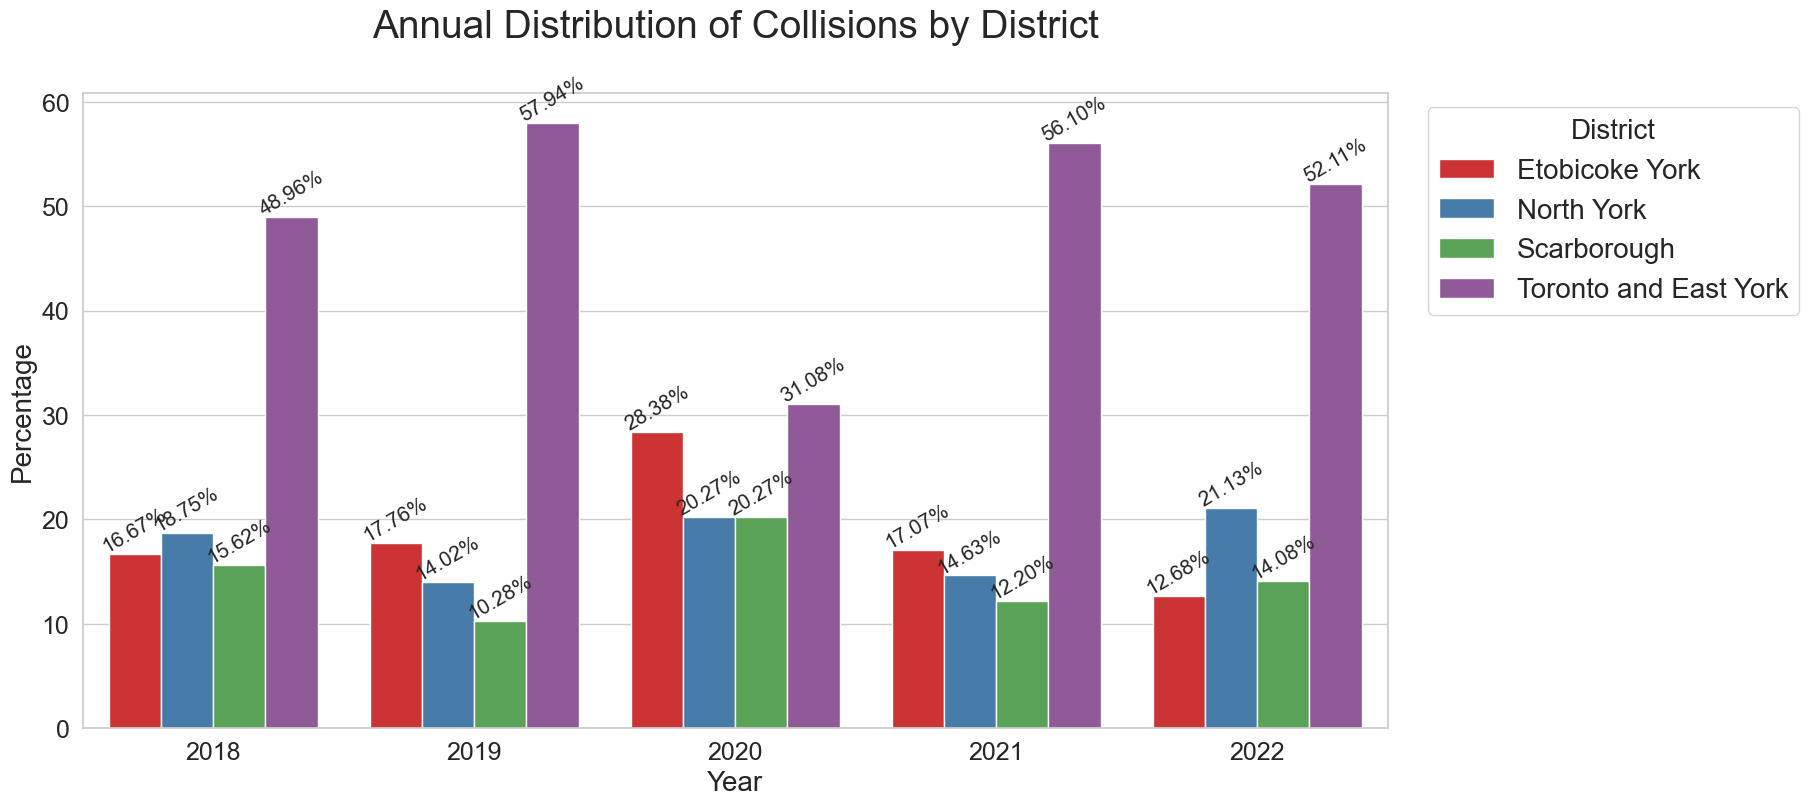

In [240]:
# PLot the graph
plt.figure(figsize=(15, 15))
ax = sns.barplot(data=collision_reg, x='year', y='percentage', hue='DISTRICT', palette='Set1')

# Adding data labels with percentages
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height + 0.2),
                ha='center', fontsize=15, rotation=30)


# Title and labels
plt.title('Annual Distribution of Collisions by District', fontsize=28, pad = 40)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Percentage', fontsize=20)

# Set the aspect ratio to control the width of bars
plt.gca().set_aspect(0.04) 

plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
# Moving legend outside the plot
plt.legend(title='District', bbox_to_anchor=(1.02, 1), loc='upper left',title_fontsize = 20, fontsize = 20)

plt.savefig('percent_district.png', bbox_inches='tight', facecolor='white', edgecolor='none', transparent=True)

To analyze for which neighbourhoods have the highest collisions, the number of collisions need to be normalized by either population or area (i.e. number of collisions/population).

`Neighbourhoods_profile` data contains population info in each neighbourhoods.
It has a column called `Total - Age groups of the population - 25% sample data`, to get the total population, the values in this column need to be multiplied by 4.

In [241]:
neighbourhoods_population = neighbourhoods_profile['Total - Age groups of the population - 25% sample data'].reset_index()

neighbourhoods_population = neighbourhoods_population.rename(columns = {'Total - Age groups of the population - 25% sample data': '0.25 total','index':'name'})

neighbourhoods_population['population'] = neighbourhoods_population['0.25 total'] * 4
neighbourhoods_population.head()

,name,0.25 total,population
0,West Humber-Clairville,33300,133200
1,Mount Olive-Silverstone-Jamestown,31345,125380
2,Thistletown-Beaumond Heights,9850,39400
3,Rexdale-Kipling,10375,41500
4,Elms-Old Rexdale,9355,37420


Join collision data with `neighbourhoods_population` 

In [242]:
col_neighbour = collision_gdf[['NEIGHBOURH', 'INDEX_']]

neighbourhoods_collision = pd.merge(neighbourhoods_population, col_neighbour, left_on = 'name', right_on = 'NEIGHBOURH', how = 'right')

#count the number of collisions in one neighbourhood
neighbourhoods_collision = neighbourhoods_collision.groupby('name').agg({'INDEX_':'count','population':'max'})

neighbourhoods_collision.head()

,INDEX_,population
name,,
Agincourt North,4,110160
Alderwood,2,50380
Annex,4,117200
Banbury-Don Mills,2,108620
Bay-Cloverhill,6,66680


Normalize by population:

In [243]:
#calculate collisions per 10,000 people
neighbourhoods_collision['collisions per 10,000 people'] = 10000*neighbourhoods_collision['INDEX_']/neighbourhoods_collision['population']

neighbourhoods_collision = neighbourhoods_collision.sort_values('collisions per 10,000 people', ascending  = False).reset_index()

#join with neighbourhoods dataframe, so that neighbourhoods_collision_gdf has a geometry column
neighbourhoods_collision_gdf = pd.merge(neighbourhoods_collision, neighbourhoods, on = 'name', how = 'right')

#to plot a complete map of toronto, fill the nan in 'collisions per 10,000 people'
neighbourhoods_collision_gdf['collisions per 10,000 people'] = neighbourhoods_collision_gdf['collisions per 10,000 people'].fillna(0)

#convert to geodataframe
neighbourhoods_collision_gdf = gpd.GeoDataFrame(neighbourhoods_collision_gdf, geometry='geometry')

neighbourhoods_collision_gdf.head()

,name,INDEX_,population,"collisions per 10,000 people",geometry,area
0,Wychwood,8.0,51200.0,1.562500,"POLYGON ((626071.503 4837537.756, 626151.708 4...",1.682042
1,Yonge-Eglinton,NaN,NaN,0.000000,"POLYGON ((628032.302 4840233.689, 628139.346 4...",1.650421
2,Yonge-St.Clair,NaN,NaN,0.000000,"POLYGON ((629674.232 4837709.743, 629657.497 4...",1.161288
3,York University Heights,8.0,113020.0,0.707839,"POLYGON ((620320.085 4846288.688, 620352.534 4...",13.246739
4,Yorkdale-Glen Park,4.0,66500.0,0.601504,"POLYGON ((625714.291 4840359.316, 625680.263 4...",6.038310


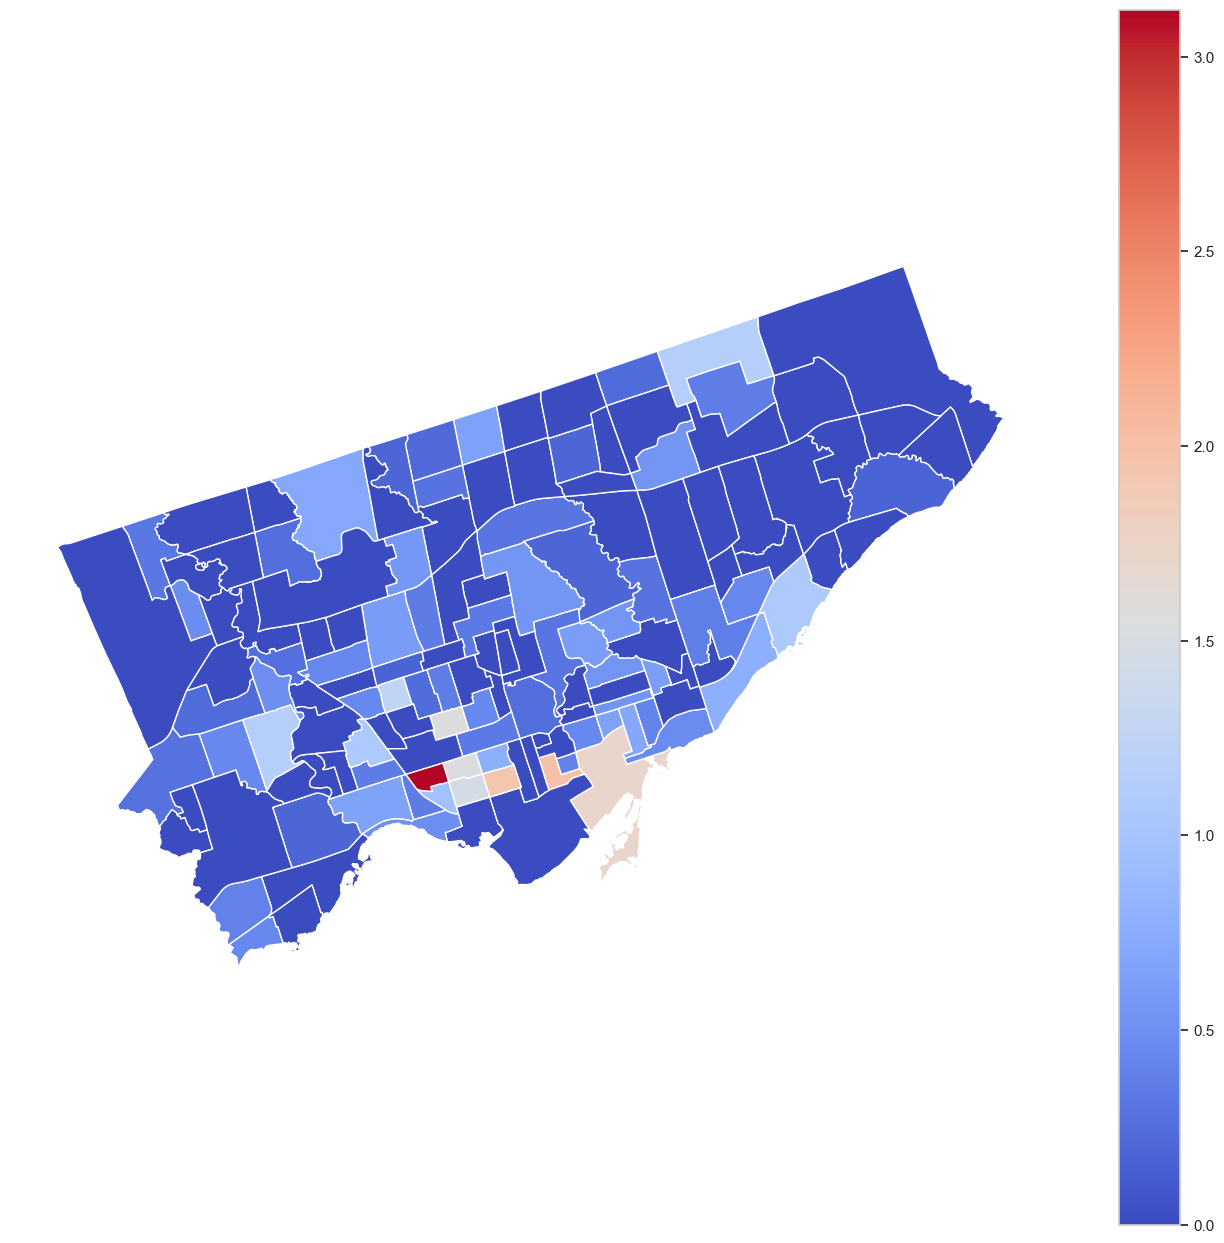

In [244]:

# Create a larger plot
fig, ax = plt.subplots(figsize=(15, 15))  # Set the size (width, height) as needed

# Plot the geometry and color code the map based on a third column
neighbourhoods_collision_gdf.plot(column='collisions per 10,000 people',ax=ax, cmap='coolwarm', legend = True)
# aspect=1, 
# Remove x and y axis
ax.set_axis_off()

plt.savefig('top5_neighbourhoods_normalized_by_population_no_label.png', bbox_inches = 'tight', facecolor = 'white')

In [203]:
from shapely.geometry import Point
from adjustText import adjust_text

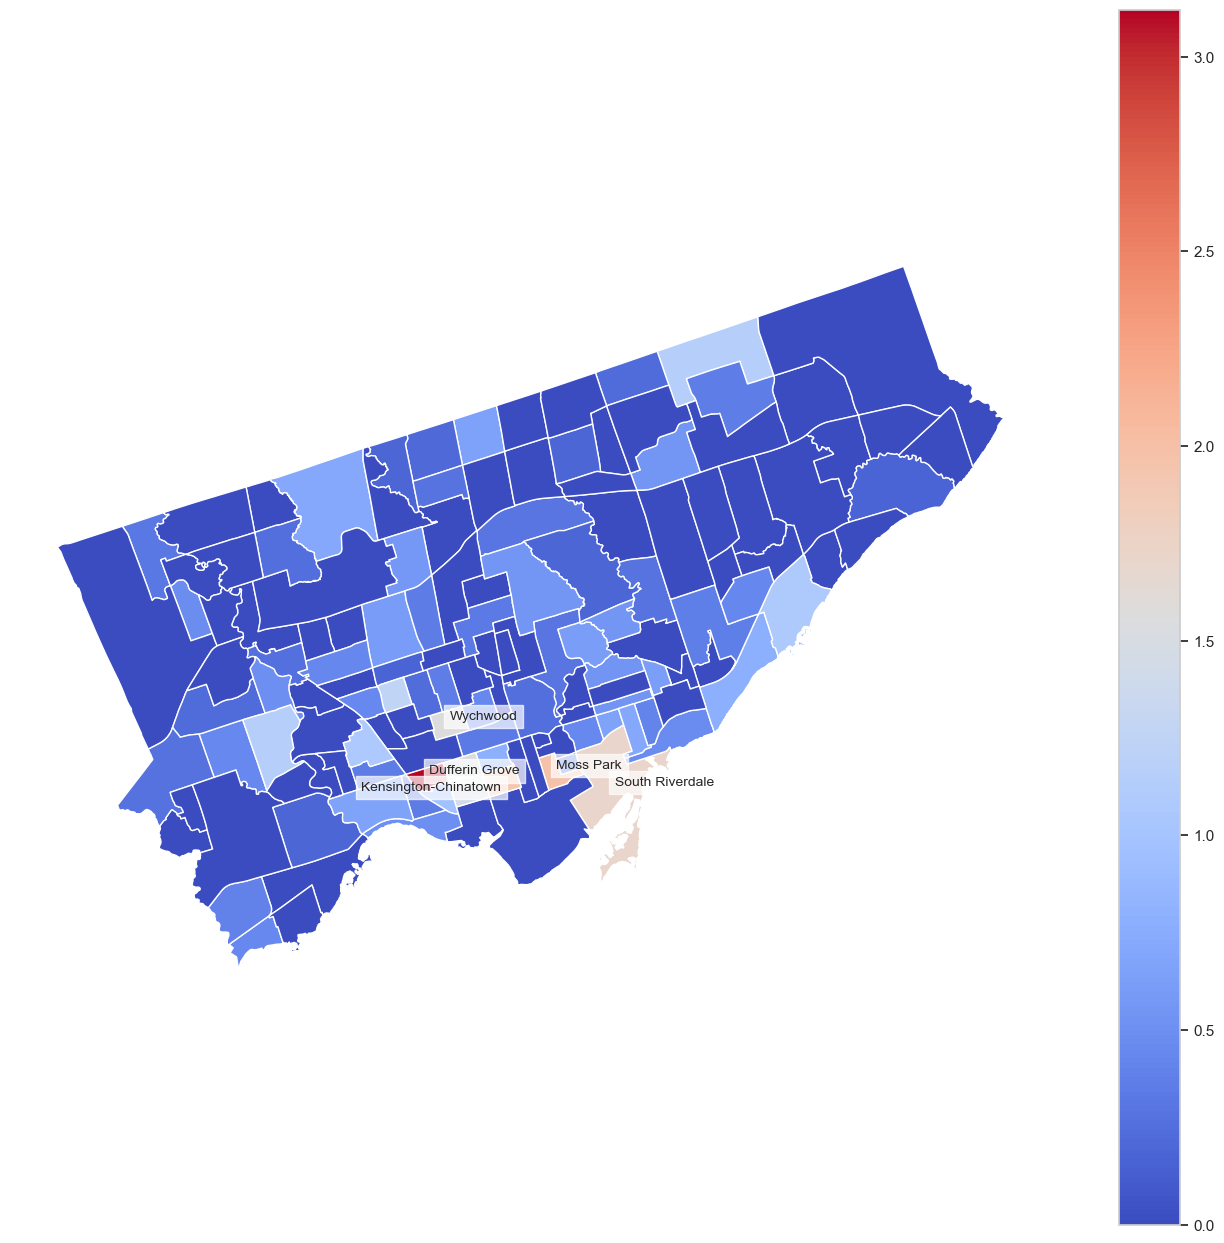

In [245]:
# Set the threshold value, since neighbourhood with the fifth most colllisions per 10,000 has 1.56, set the threshold to be 1.55 so that the data labels will only appear for the top five neighbourhoods
# Set the threshold value
threshold = 1.55  # Adjust this value as needed

# Create a larger plot
fig, ax = plt.subplots(figsize=(15, 15))  # Set the size (width, height) as needed

# Plot the geometry and color code the map based on a third column
neighbourhoods_collision_gdf.plot(column='collisions per 10,000 people', aspect=1, ax=ax, cmap='coolwarm', legend = True)

# Add data labels using values from another column
texts = []
for idx, row in neighbourhoods_collision_gdf.iterrows():
    if row['collisions per 10,000 people'] > threshold:
        point = Point(row.geometry.centroid.x, row.geometry.centroid.y)
        text = plt.text(point.x, point.y, str(row['name']), ha='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.7))
        texts.append(text)

# Adjust label positions to avoid overlap
adjust_text(texts, ax=ax, precision=0.5, expand_text=(1.01, 1.01), force_text=(0.5, 0.5), lim=1000)

# Remove x and y axis
ax.set_axis_off()

plt.savefig('top5_neighbourhoods_normalized_by_population.png', bbox_inches = 'tight', facecolor = 'white')

Normalize by area

The area of the neighbourhoods can be calculated using the polygons in the geometry column in the `neighbourhoods` dataframe.

In [246]:
neighbourhoods_area = neighbourhoods

neighbourhoods_area['area'] = neighbourhoods_area.geometry.area #this is in m^2
neighbourhoods_area['area'] = neighbourhoods_area['area']*1e-6 #now it's in km^2

neighbourhoods_collision_area = pd.merge(neighbourhoods_area, col_neighbour, left_on = 'name', right_on = 'NEIGHBOURH', how = 'right')

#count the number of collisions in one neighbourhood
neighbourhoods_collision_area = neighbourhoods_collision_area.groupby('name').agg({'INDEX_':'count','area':'max'})

neighbourhoods_collision_area.head()

,INDEX_,area
name,,
Agincourt North,4,7.262056
Alderwood,2,4.978388
Annex,4,2.790299
Banbury-Don Mills,2,10.041682
Birchcliffe-Cliffside,7,6.009067


In [247]:
#calculate collisions per square km 
neighbourhoods_collision_area['collisions per square km'] = neighbourhoods_collision_area['INDEX_']/neighbourhoods_collision_area['area']

neighbourhoods_collision_area = neighbourhoods_collision_area.sort_values('collisions per square km', ascending  = False).reset_index()

#join with neighbourhoods dataframe, so that neighbourhoods_collision_gdf has a geometry column
neighbourhoods_collision_area_gdf = pd.merge(neighbourhoods_collision_area, neighbourhoods, on = 'name', how = 'right')

#to plot a complete map of toronto, fill the nan in 'collisions per 10,000 people'
neighbourhoods_collision_area_gdf['collisions per square km'] = neighbourhoods_collision_area_gdf['collisions per square km'].fillna(0)

#convert to geodataframe
neighbourhoods_collision_area_gdf = gpd.GeoDataFrame(neighbourhoods_collision_area_gdf, geometry='geometry')
neighbourhoods_collision_area_gdf = neighbourhoods_collision_area_gdf.sort_values('collisions per square km', ascending = False)

neighbourhoods_collision_area_gdf.head()

,name,INDEX_,area_x,collisions per square km,geometry,area_y
18,Moss Park,17.0,1.413028,12.030903,"POLYGON ((632910.604 4834938.350, 632883.548 4...",1.413028
108,Dufferin Grove,14.0,1.387967,10.086695,"POLYGON ((624994.979 4834931.307, 625012.568 4...",1.387967
136,Kensington-Chinatown,14.0,1.534607,9.122854,"POLYGON ((628713.653 4833925.535, 628698.164 4...",1.534607
33,Palmerston-Little Italy,8.0,1.435255,5.573923,"POLYGON ((626894.128 4834603.189, 626805.400 4...",1.435255
58,Trinity-Bellwoods,9.0,1.729621,5.203452,"POLYGON ((627237.529 4833486.591, 627225.791 4...",1.729621


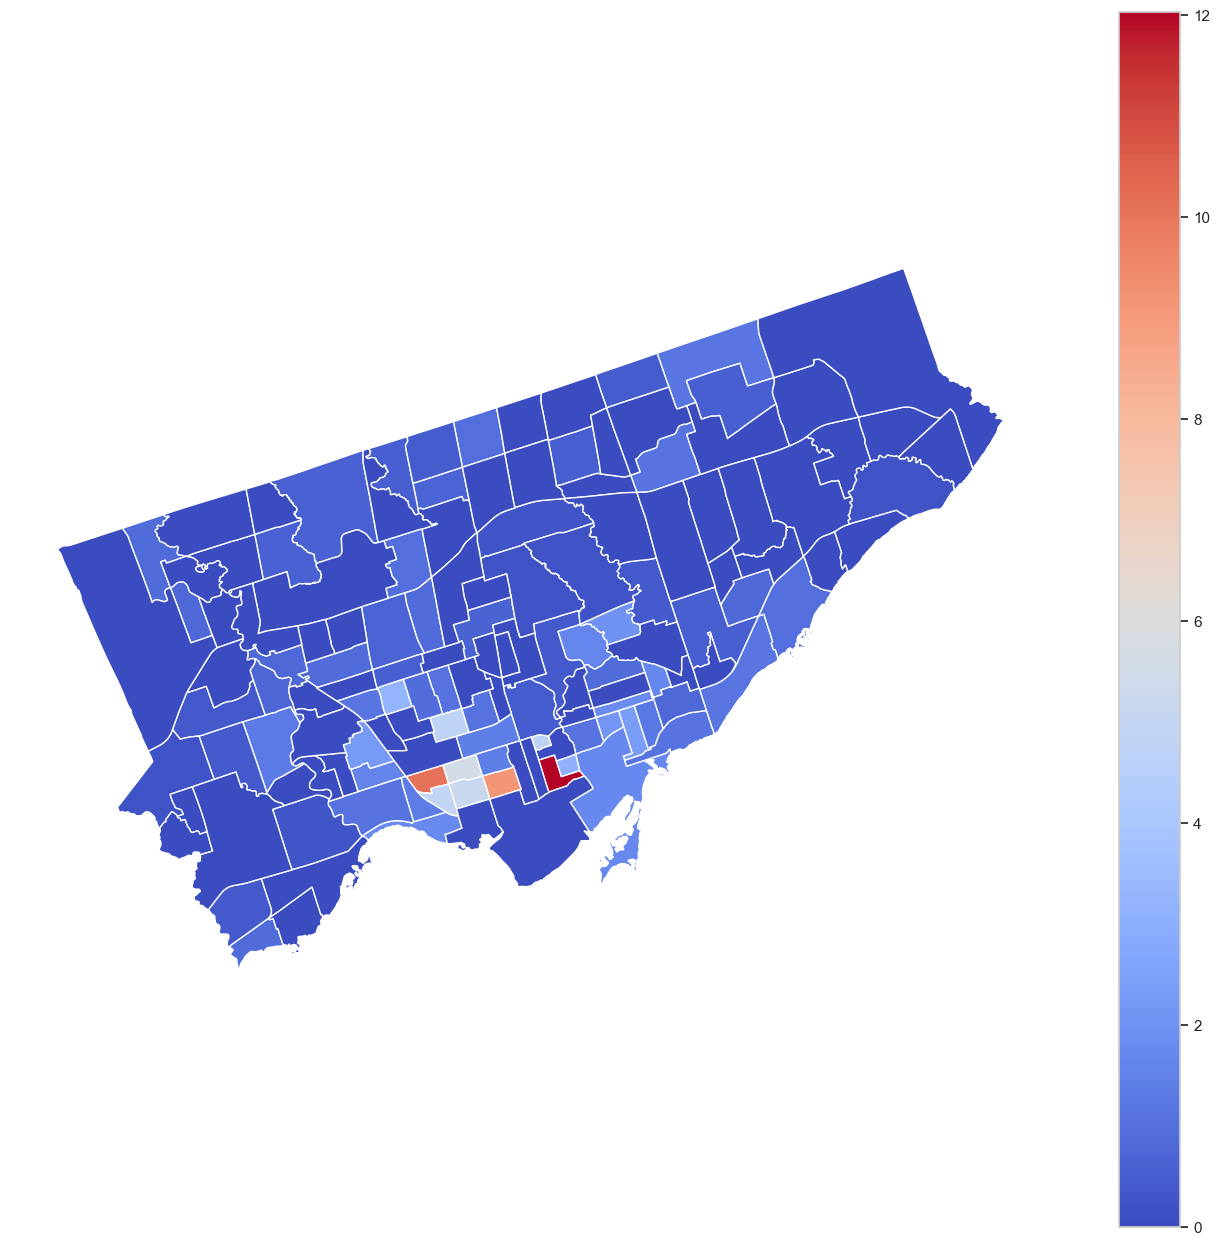

In [248]:
#plot 
# Create a larger plot
fig, ax = plt.subplots(figsize=(15, 15))  # Set the size (width, height) as needed

# Plot the geometry and color code the map based on a third column
neighbourhoods_collision_area_gdf.plot(column='collisions per square km',ax=ax, cmap='coolwarm', legend = True)
# aspect=1, 
# Remove x and y axis
ax.set_axis_off()

plt.savefig('top5_neighbourhoods_normalized_by_area_no_label.png', bbox_inches = 'tight', facecolor = 'white')

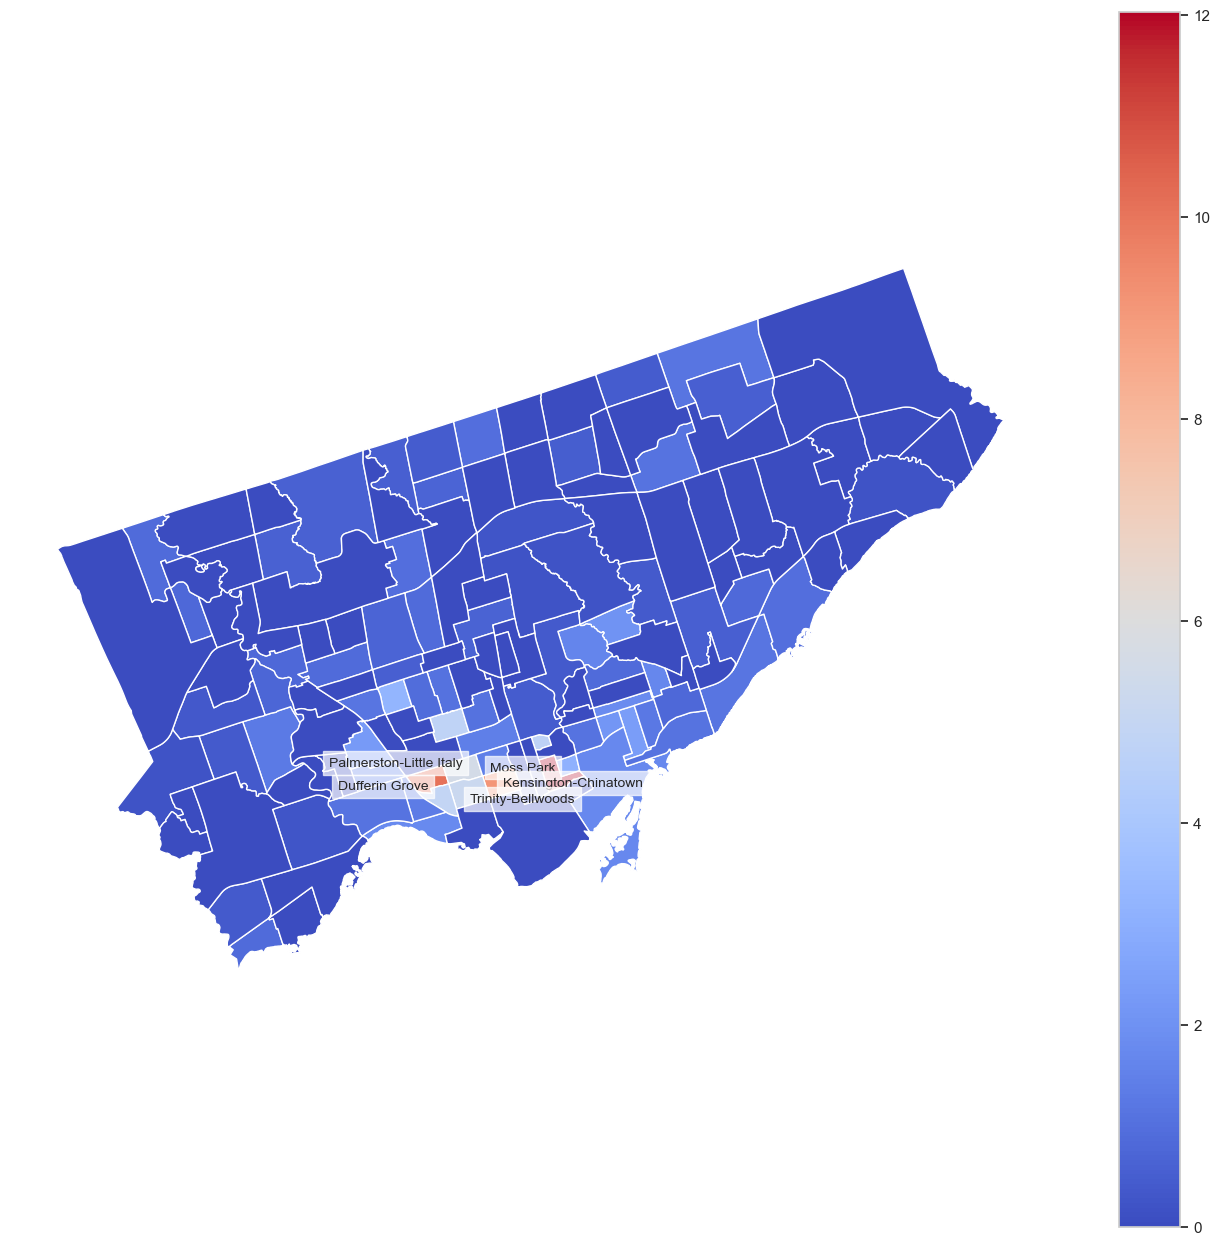

In [249]:
# Set the threshold value, since neighbourhood with the fifth most colllisions per 10,000 has 1.56, set the threshold to be 5.2 so that the data labels will only appear for the top five neighbourhoods
# Set the threshold value
threshold = 5.2  # Adjust this value as needed

# Create a larger plot
fig, ax = plt.subplots(figsize=(15, 15))  # Set the size (width, height) as needed

# Plot the geometry and color code the map based on a third column
neighbourhoods_collision_area_gdf.plot(column='collisions per square km', aspect=1, ax=ax, cmap='coolwarm', legend = True)

# Add data labels using values from another column
texts = []
for idx, row in neighbourhoods_collision_area_gdf.iterrows():
    if row['collisions per square km'] > threshold:
        point = Point(row.geometry.centroid.x, row.geometry.centroid.y)
        text = plt.text(point.x, point.y, str(row['name']), ha='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.7))
        texts.append(text)

# Adjust label positions to avoid overlap
adjust_text(texts, ax=ax, precision=0.5, expand_text=(1.01, 1.01), force_text=(0.5, 0.5), lim=1000)

# Remove x and y axis
ax.set_axis_off()

plt.savefig('top5_neighbourhoods_normalized_by_area.png', bbox_inches = 'tight', facecolor = 'white')

### Heat map

In [3]:
import folium

In [1]:
from folium.plugins import HeatMap

Plot a heat map with all the collisions from 2018-2022, see if there's any hotspot:

In [19]:
# Create a map of Toronto
map_5 = folium.Map(location=[43.6426, -79.3871], 
                   tiles='cartodbpositron', 
                   zoom_start=11)

# Add points to the map
HeatMap(data=list(zip(collision_gdf.to_crs(epsg=4326).geometry.y,
                      collision_gdf.to_crs(epsg=4326).geometry.x)),
        radius=20).add_to(map_5)

# Display map
map_5
#save
map_5.save("heatmap_all_collision.html")

Create a buffer

In [10]:
collision_gdf.to_crs(epsg = 26917)

In [224]:
collision_buffer = collision_gdf.buffer(500)
collision_buffer.head()

1001    POLYGON ((-8844166.500 5433115.618, -8844168.9...
1002    POLYGON ((-8844166.500 5433115.618, -8844168.9...
1003    POLYGON ((-8834434.394 5419362.224, -8834436.8...
1004    POLYGON ((-8834434.394 5419362.224, -8834436.8...
1005    POLYGON ((-8846875.794 5417393.496, -8846878.2...
dtype: geometry

In [225]:
from folium import GeoJson

In [251]:
map_8 = folium.Map(location=[43.6426, -79.3871], 
                   tiles='cartodbpositron', 
                   zoom_start=10)
    
# Plot each polygon on the map
GeoJson(collision_buffer.to_crs(epsg=4326)).add_to(map_8)

# Show the map
map_8


### Distribution by age groups

In [252]:
collision_age = collision_gdf

#group by age group `INVAGE`, count the number of collisiosn within each group
collision_age = collision_age.groupby(['INVAGE']).agg({'INDEX_': 'count'}).reset_index().sort_values('INVAGE')

#in the final figure,the x axis tick marks will be order based on number orders, so 5 to 9 will not be the second bar.So combine age groups 0-4 and 5-9 into one group and call it `0-10`
collision_age['INVAGE'] = collision_age['INVAGE'].replace({'0 to 4': '0 to 10','5 to 9': '0 to 10'})
collision_age = collision_age.groupby('INVAGE').sum('INDEX_').reset_index().sort_values('INVAGE',ascending = True)
collision_age

,INVAGE,INDEX_
0,0 to 10,2
1,10 to 14,9
2,15 to 19,18
3,20 to 24,50
4,25 to 29,38
5,30 to 34,40
6,35 to 39,33
7,40 to 44,28
8,45 to 49,30
9,50 to 54,30


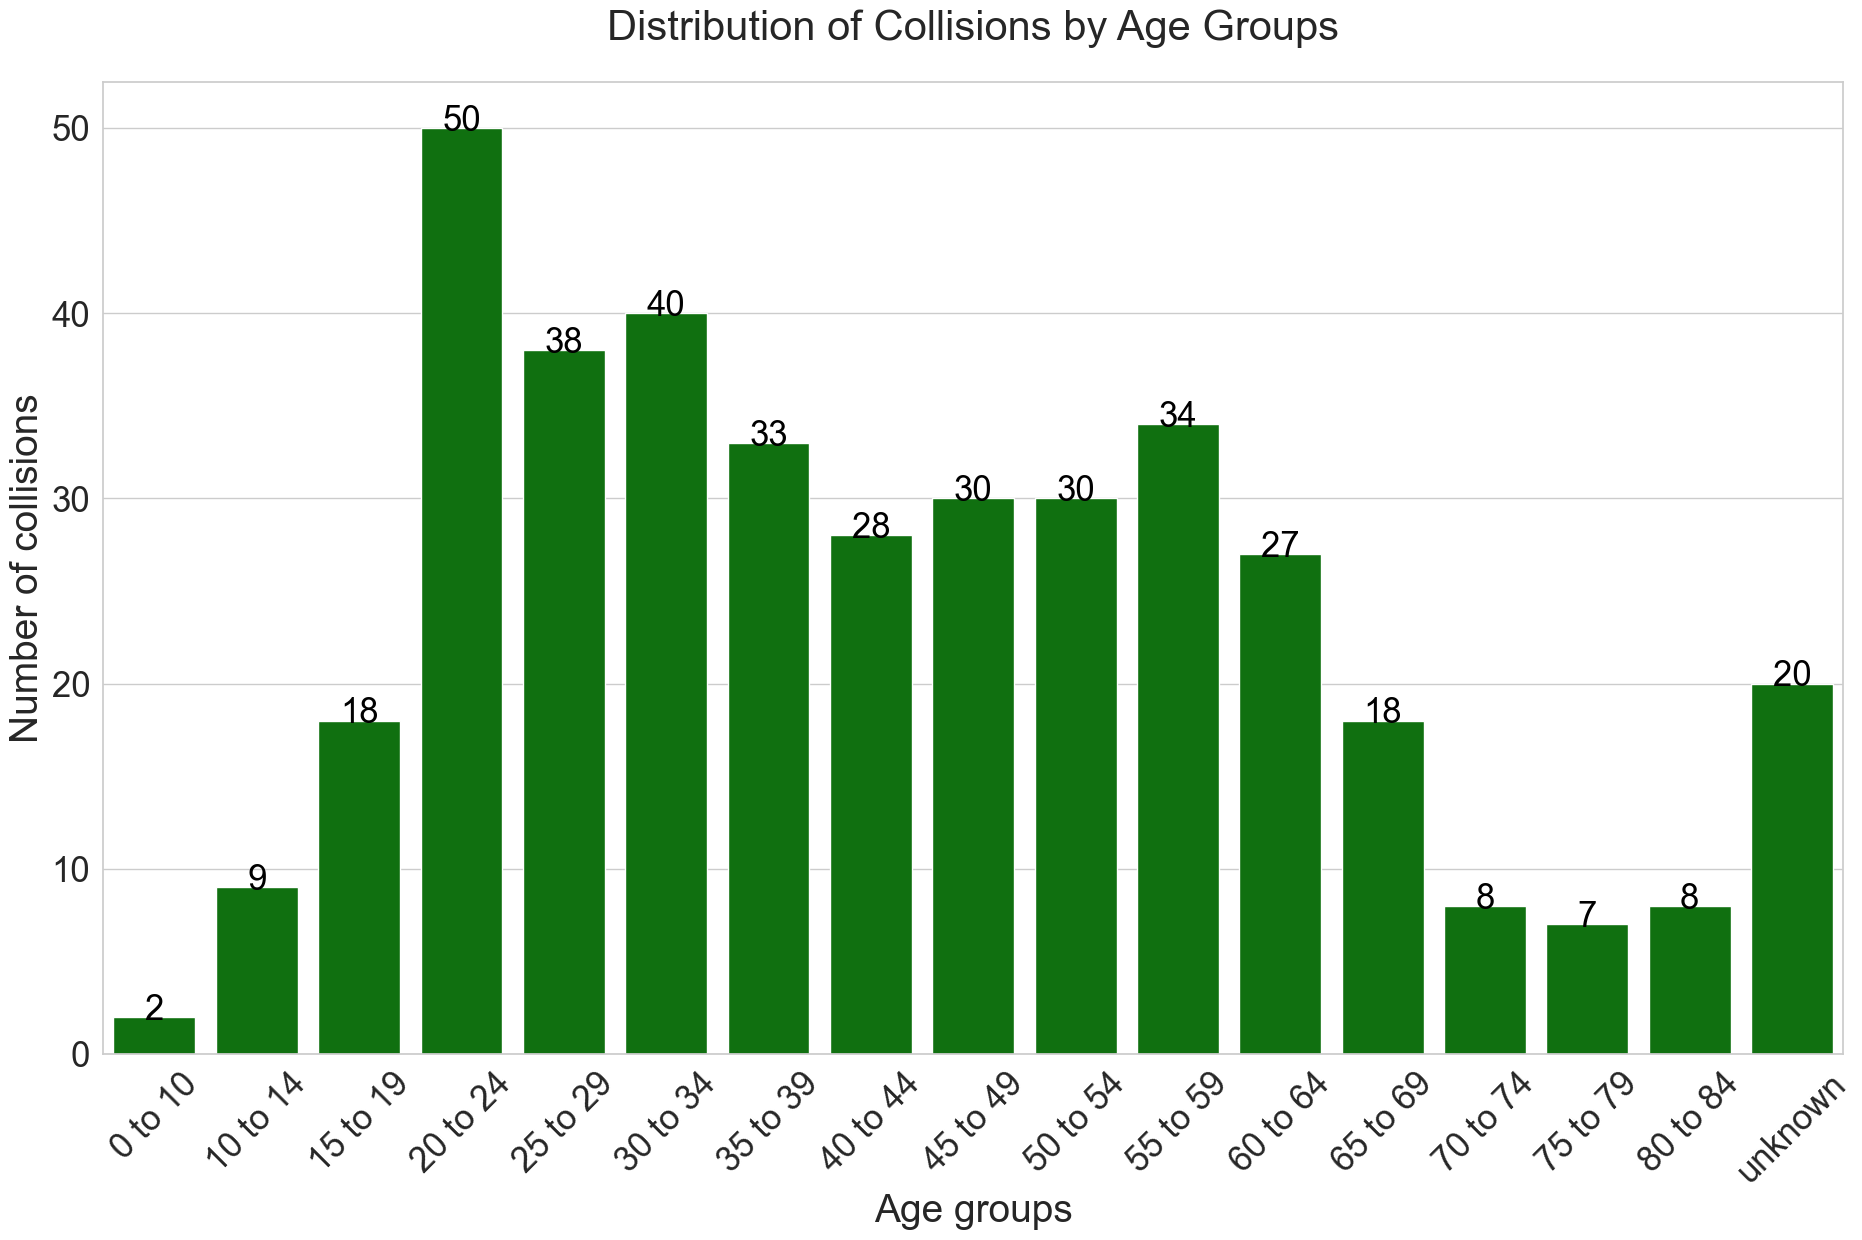

In [253]:
plt.figure(figsize=(20, 12))
ax = sns.barplot(data=collision_age, x='INVAGE', y='INDEX_', color = 'green')
plt.title('Distribution of Collisions by Age Groups', fontsize=30, pad=30)
plt.xlabel('Age groups', fontsize=28)
plt.ylabel('Number of collisions', fontsize=28)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=25, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xticks(rotation=45, fontsize =25)
plt.yticks(fontsize =25)
plt.savefig('distribution by age total', bbox_inches = 'tight', facecolor = 'white')

Looking at the monthly distribution, June and September have the highest number of collisions. It was hypothesized that age distribution might have something to do with that: 

In [254]:
#select collision happened in september only:
sep_col = collision_gdf.loc[collision_gdf['DATE'].dt.month == 9]

#group by age group `INVAGE`, count the number of collisiosn within each group
sep_col = sep_col.groupby(['INVAGE']).agg({'INDEX_': 'count'}).reset_index().sort_values('INVAGE')

#in the final figure,the x axis tick marks will be order based on number orders, so 5 to 9 will not be the second bar.So combine age groups 0-4 and 5-9 into one group and call it `0-10`
sep_col['INVAGE'] = sep_col['INVAGE'].replace({'0 to 4': '0 to 10','5 to 9': '0 to 10'})
sep_col = sep_col.groupby('INVAGE').sum('INDEX_').reset_index().sort_values('INVAGE',ascending = True)
sep_col

,INVAGE,INDEX_
0,10 to 14,1
1,15 to 19,2
2,20 to 24,9
3,25 to 29,4
4,30 to 34,8
5,35 to 39,6
6,40 to 44,5
7,45 to 49,7
8,50 to 54,9
9,55 to 59,6


In [255]:
#select collision happened in June only:
jun_col = collision_gdf.loc[collision_gdf['DATE'].dt.month == 6]

#group by age group `INVAGE`, count the number of collisiosn within each group
jun_col = jun_col.groupby(['INVAGE']).agg({'INDEX_': 'count'}).reset_index().sort_values('INVAGE')

#in the final figure,the x axis tick marks will be order based on number orders, so 5 to 9 will not be the second bar.So combine age groups 0-4 and 5-9 into one group and call it `0-10`
jun_col['INVAGE'] = jun_col['INVAGE'].replace({'0 to 4': '0 to 10','5 to 9': '0 to 10'})
jun_col = jun_col.groupby('INVAGE').sum('INDEX_').reset_index().sort_values('INVAGE',ascending = True)
jun_col

,INVAGE,INDEX_
0,10 to 14,4
1,15 to 19,1
2,20 to 24,12
3,25 to 29,8
4,30 to 34,2
5,35 to 39,4
6,45 to 49,3
7,50 to 54,5
8,55 to 59,8
9,60 to 64,3


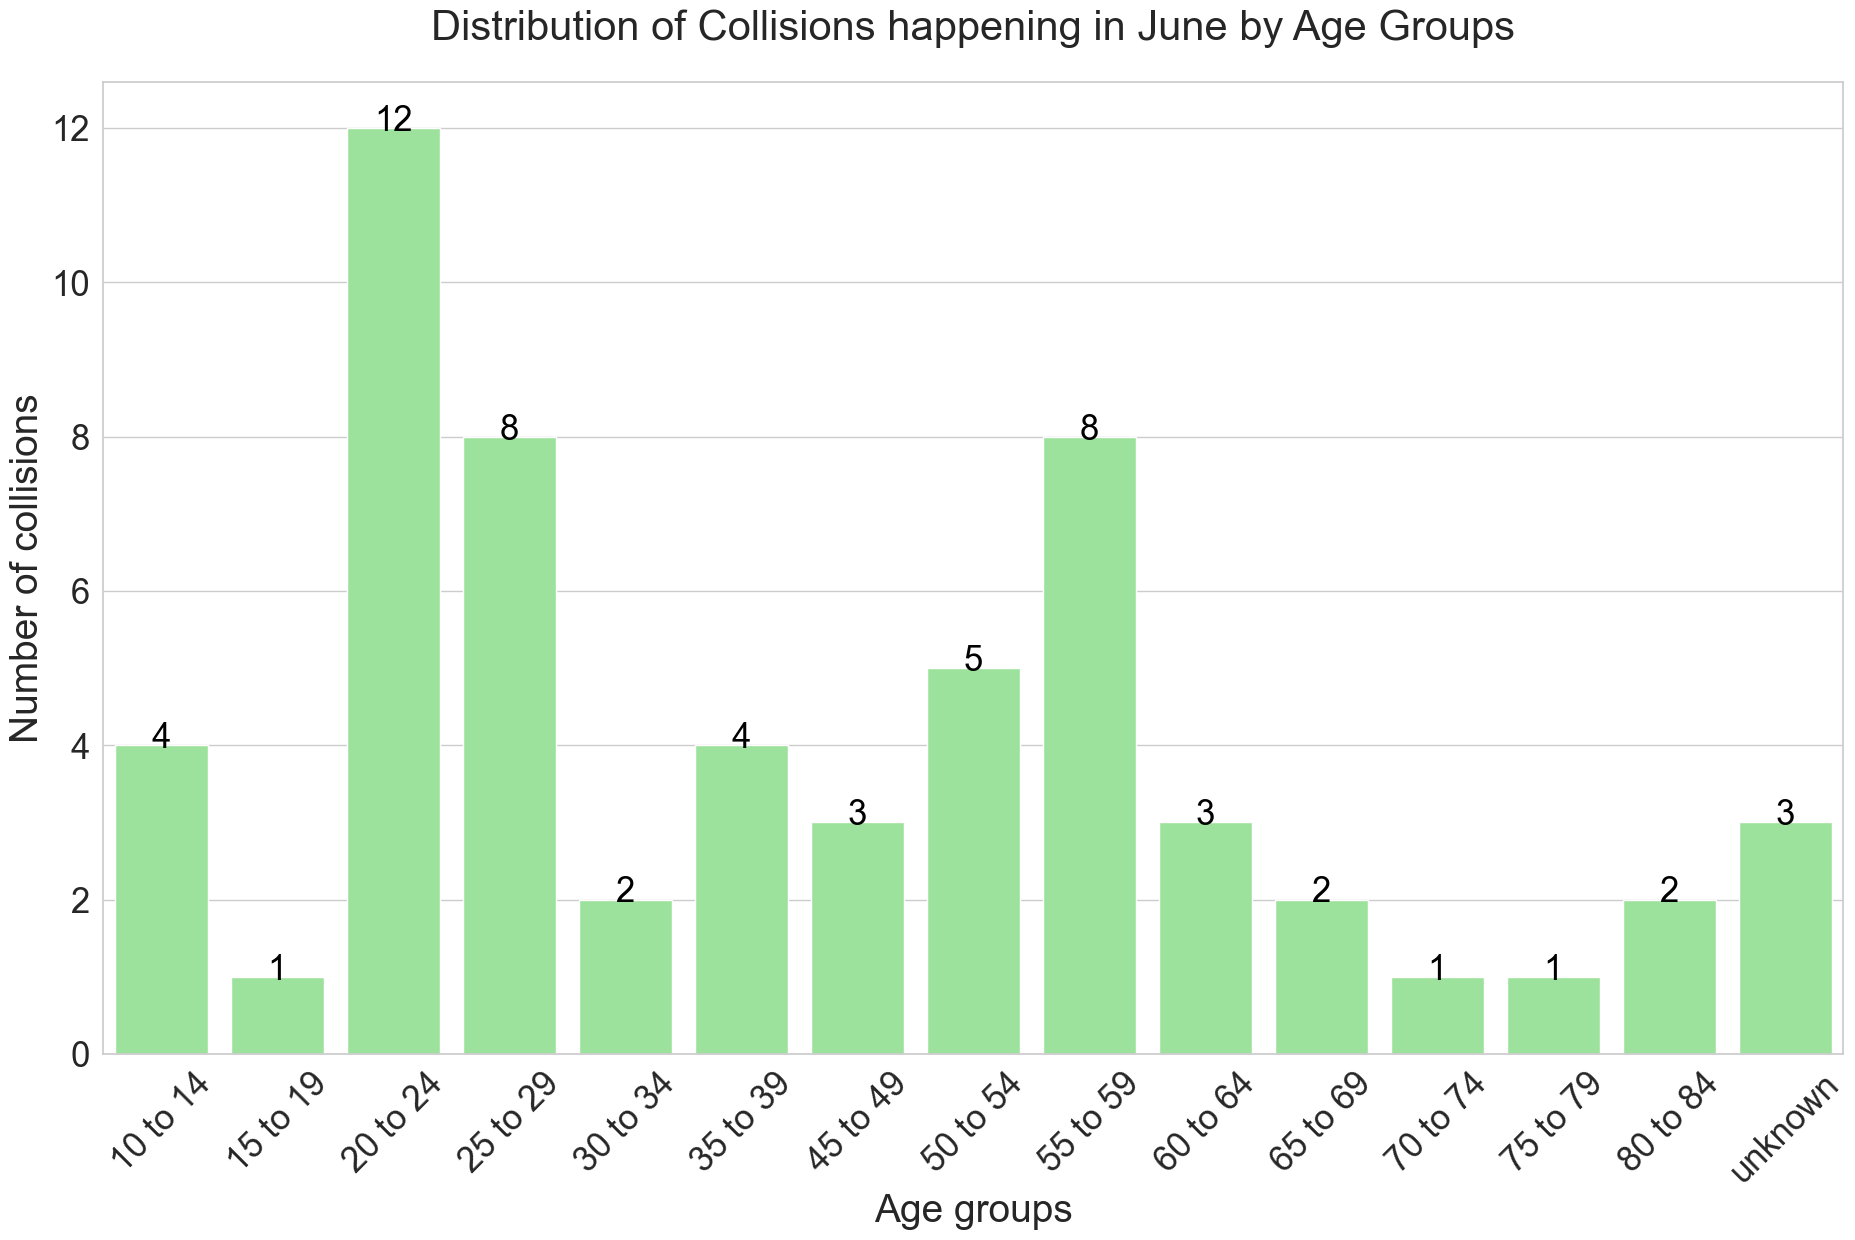

In [256]:
#plot age distribution in June
plt.figure(figsize=(20, 12))
ax = sns.barplot(data=jun_col, x='INVAGE', y='INDEX_', color='lightgreen')
plt.title('Distribution of Collisions happening in June by Age Groups', fontsize=30, pad = 30)
plt.xlabel('Age groups', fontsize=28)
plt.ylabel('Number of collisions', fontsize=28)

#add labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=25, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xticks(rotation=45, fontsize =25)
plt.yticks(fontsize =25)

plt.savefig('distribution by age June.png', bbox_inches = 'tight', facecolor = 'white')

In [257]:
#select collision happened in august only:
aug_col = collision_gdf.loc[collision_gdf['DATE'].dt.month == 8]

#group by age group `INVAGE`, count the number of collisiosn within each group
aug_col = aug_col.groupby(['INVAGE']).agg({'INDEX_': 'count'}).reset_index().sort_values('INVAGE')

#in the final figure,the x axis tick marks will be order based on number orders, so 5 to 9 will not be the second bar.So combine age groups 0-4 and 5-9 into one group and call it `0-10`
aug_col['INVAGE'] = aug_col['INVAGE'].replace({'0 to 4': '0 to 10','5 to 9': '0 to 10'})
aug_col = aug_col.groupby('INVAGE').sum('INDEX_').reset_index().sort_values('INVAGE',ascending = True)
aug_col

,INVAGE,INDEX_
0,10 to 14,3
1,15 to 19,3
2,20 to 24,5
3,25 to 29,6
4,30 to 34,6
5,35 to 39,1
6,40 to 44,4
7,45 to 49,5
8,50 to 54,2
9,55 to 59,3


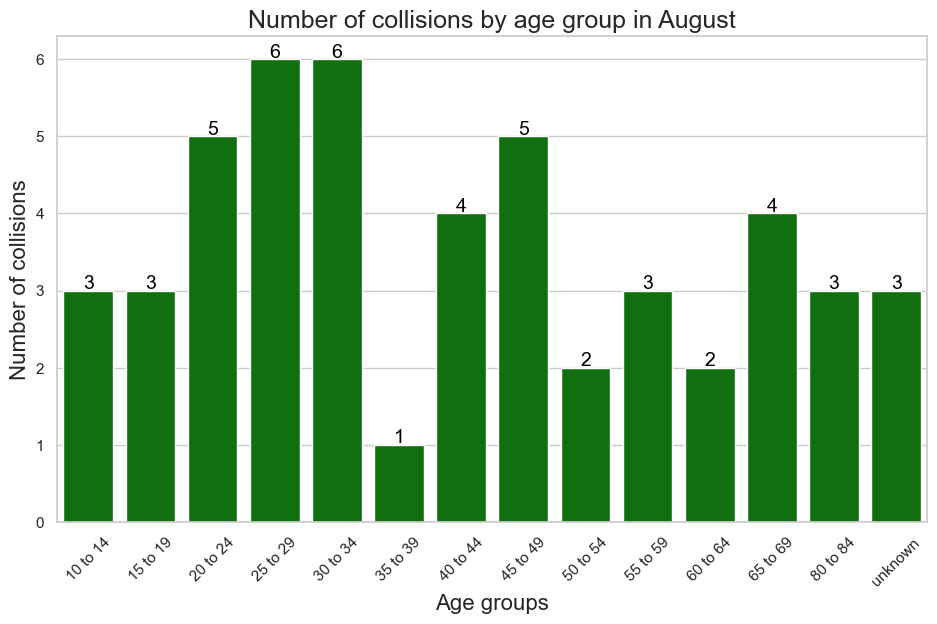

In [258]:
#plot age distribution in August
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=aug_col, x='INVAGE', y='INDEX_', color='green')
plt.title('Number of collisions by age group in August', fontsize=18)
plt.xlabel('Age groups', fontsize=16)
plt.ylabel('Number of collisions', fontsize=16)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=14, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xticks(rotation=45)

plt.show()

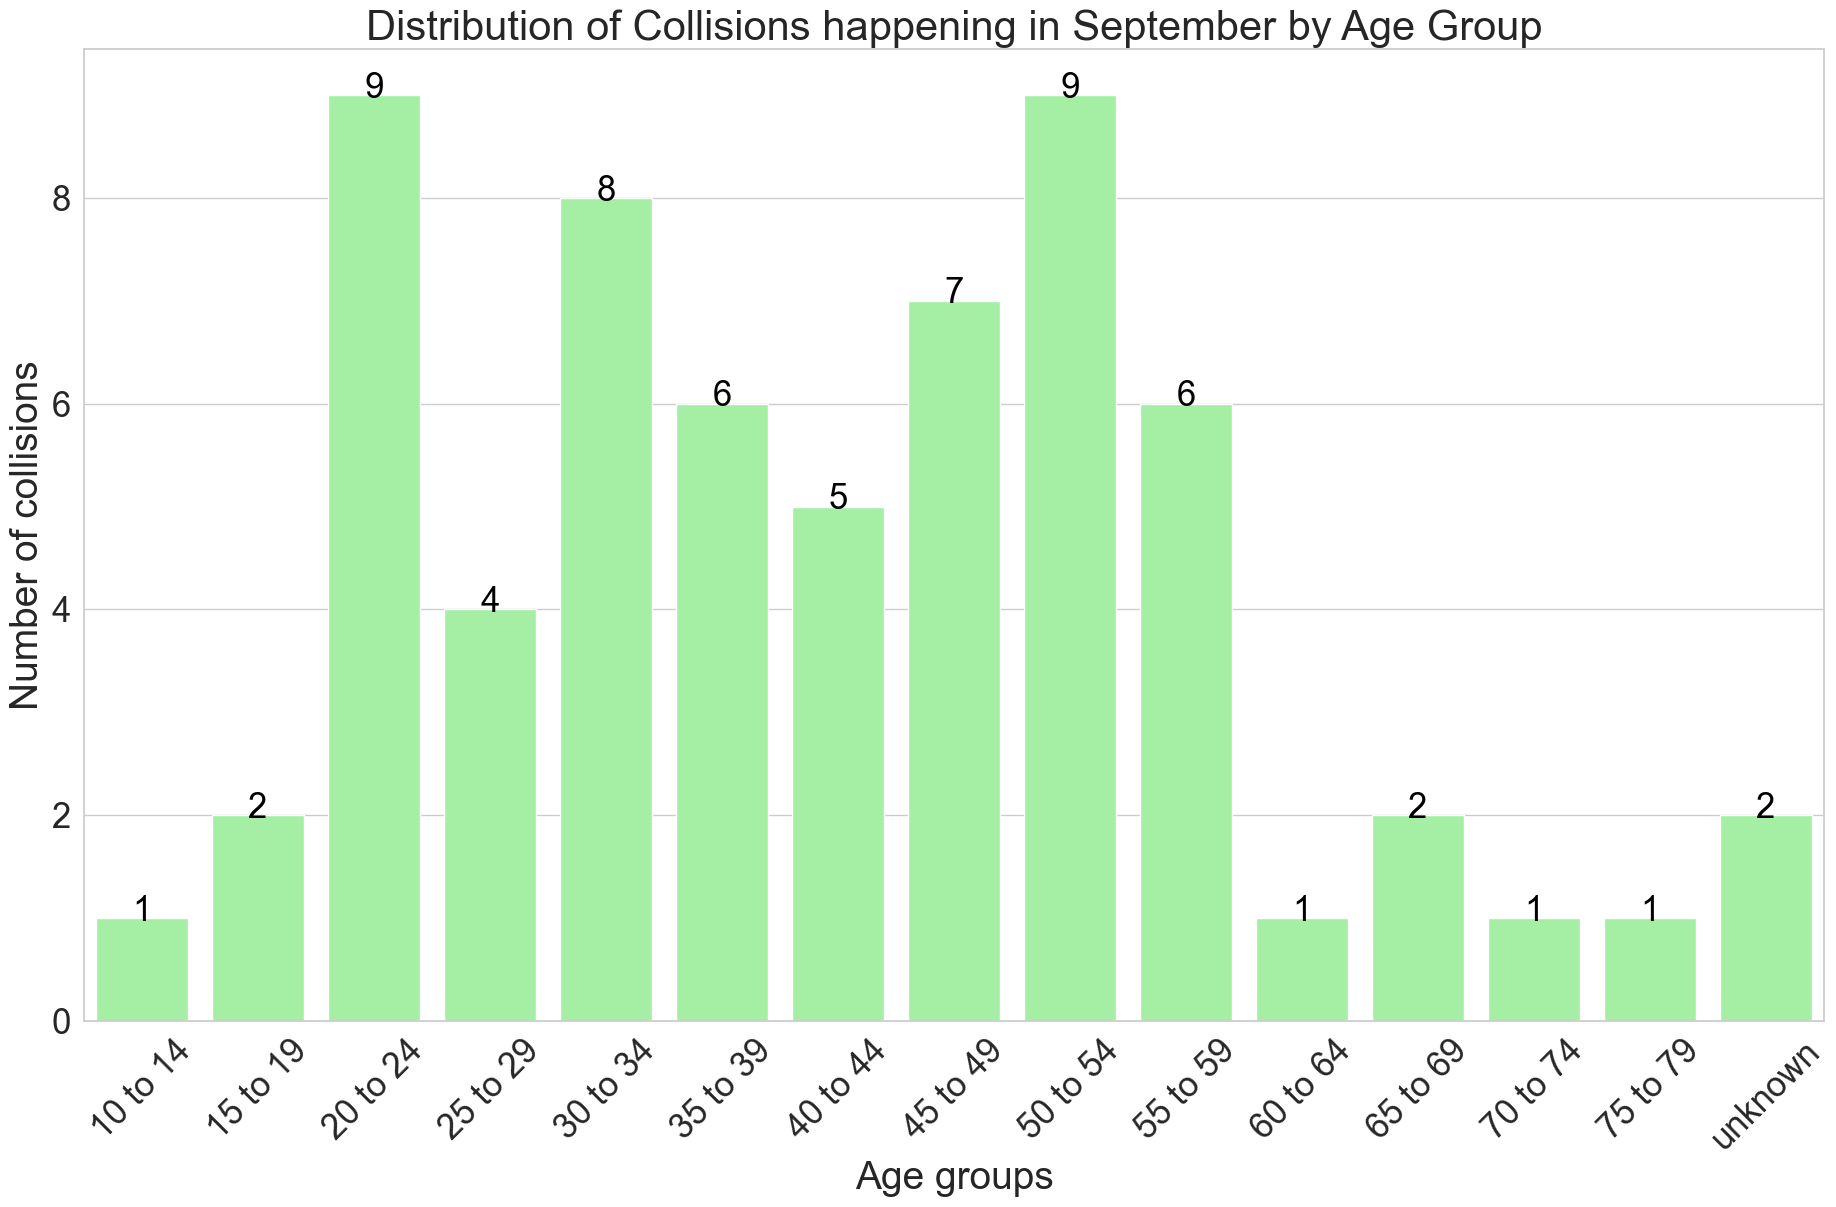

In [259]:
#plot age distribution in September
plt.figure(figsize=(20, 12))
ax = sns.barplot(data=sep_col, x='INVAGE', y='INDEX_', color='palegreen')
plt.title('Distribution of Collisions happening in September by Age Group', fontsize=30)
plt.xlabel('Age groups', fontsize=28)
plt.ylabel('Number of collisions', fontsize=28)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=25, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xticks(rotation=45, fontsize =25)
plt.yticks(fontsize =25)

plt.savefig('distribution by age September.png', bbox_inches = 'tight', facecolor = 'white')